# Artificial Intelligence and Machine Learning

## Unit II


## Linear Regression

## My own latex definitions

$$\def\mbf#1{\mathbf{#1}}$$
$$\def\bmf#1{\boldsymbol{#1}}$$
$$\def\bx{\mbf{x}}$$
$$\def\bv{\mbf{v}}$$
$$\def\bz{\mbf{z}}$$
$$\def\bmu{\bmf{\mu}}$$
$$\def\bsigma{\bmf{\Sigma}}$$
$$\def\Rd#1{\in \mathbb{R}^{#1}}$$

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#plt.style.use('seaborn-whitegrid')

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


# Aux functions

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled
        
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# plt.style.use('seaborn-whitegrid')

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


# Aux functions

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled
        
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

# Recap previous lecture
- Model Selection and Assessment
- Cross-validation 
- Evaluation Metrics

# Today's lecture
## We go back to your loved 🥰 Linear Algebra
## Supervised, <ins>Parametric</ins> Models


### 1) Ordinary Linear Regression with Least Squares
### 2) Probabilistic Interpretation 
### 3) Gradient Descent "Family"

# This lecture material is taken from

- [Mostly from Stanford class](https://www.youtube.com/watch?v=lNHaZlZJATw)
- [Stanford notes](http://cs229.stanford.edu/summer2019/cs229-notes1.pdf)
- [Tibshirani - Chapter 4 page 43](https://hastie.su.domains/ElemStatLearn/)
- [Sklearn model selection](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
- [Bishop - Chapter 3 page 137]()

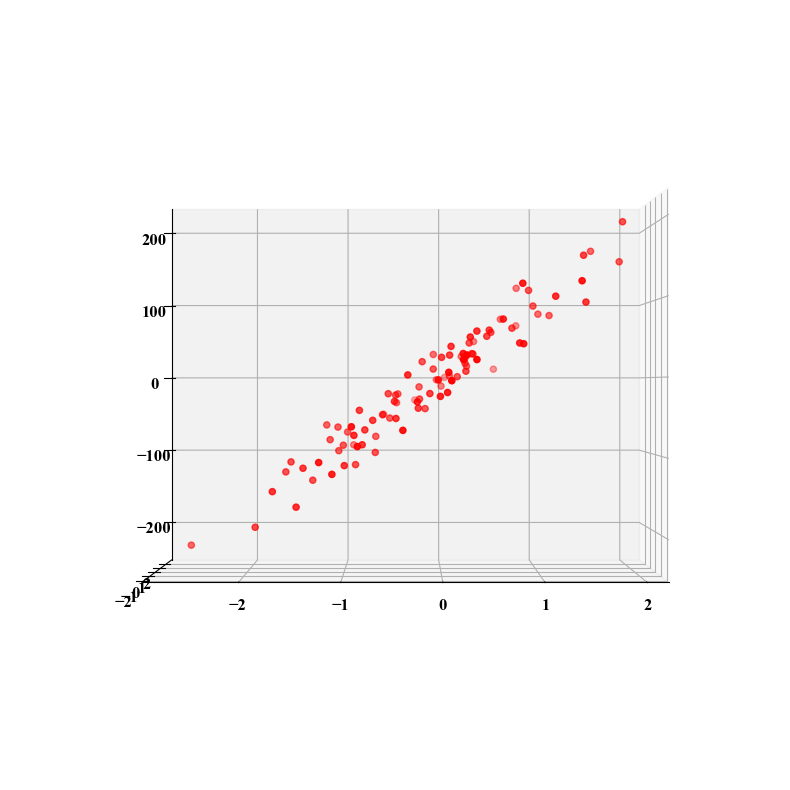

In [46]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 100
size = 10

X, y, coef_gt = datasets.make_regression(
    n_samples=n_samples,
    n_features=2,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42,
)
fig = plt.figure(figsize=(size, size))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[..., 0], X[..., 1], y, c='red', marker='o')
ax.view_init(0, -90)

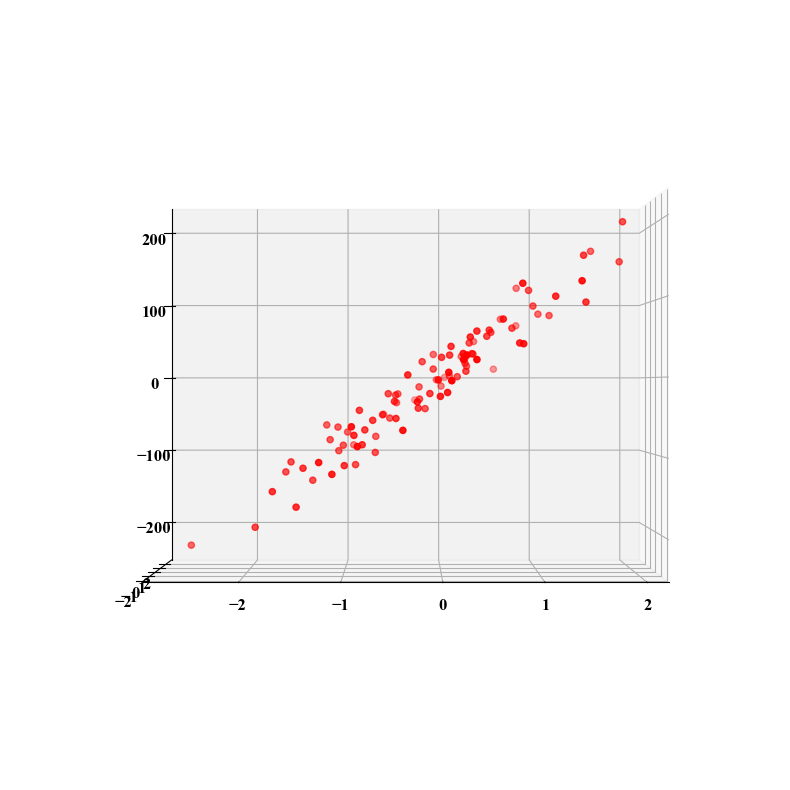

In [47]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 100
size = 10

X, y, coef_gt = datasets.make_regression(
    n_samples=n_samples,
    n_features=2,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42,
)
fig = plt.figure(figsize=(size, size))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[..., 0], X[..., 1], y, c='red', marker='o')
ax.view_init(0, -90)

In [48]:
table = "| x_1| x_2 | y| \n | --- | --- | --- \n"
for count, (ex, ey) in enumerate(zip(X,y)):
    table += f"| {str(ex[0])[:6]}| {str(ex[1])[:6]} | {str(ey)[:6]} \n"
    if count == 10: break

 # The data

In [49]:
print(table)

| x_1| x_2 | y| 
 | --- | --- | --- 
| -1.415| -0.420 | -116.6 
| 0.5219| 0.2969 | 58.737 
| -0.889| -0.815 | -73.89 
| -0.883| 0.1537 | -113.3 
| 0.7384| 0.1713 | 63.998 
| -0.264| 2.7201 | -30.33 
| 1.1428| 0.7519 | 81.616 
| 0.3613| 1.5380 | 48.283 
| 0.8125| 1.3562 | 119.06 
| -0.223| 0.7140 | -12.36 
| -1.106| -1.196 | -122.4 



# Living area vs Apartment Price

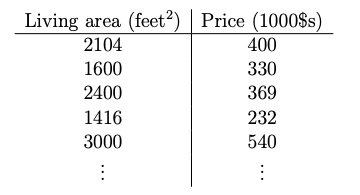

# Linear Regression settings


We want to regress $y$ from $\mbf{x}$ that is we want to learn a function $f_{\boldsymbol{\theta}}$ parametrized by some parameters $\boldsymbol{\theta}$ so that $ f_{\boldsymbol{\theta}}: \underbrace{\mbf{x}}_{\text{input}} \mapsto \underbrace{y}_{\text{output}}$ 

- $\mbf{x} \in \mathbb{R}^d$ (here d=2)
- $y$ is a scalar that is continuous $y \in \mathbb{R}$
- We have a finite number of samples $D = \{\mbf{x}_i,y_i\}_{i=1}^n \sim p(\mbf{x},y)$ that which labels are generated from a function  $f$ plus error so $y = f(\mbf{x}) + \epsilon$

# Linear Hypothesis

We assume the relation $f \longleftrightarrow y$ is **linear**.

We know $D = \{\mbf{x}_i,y_i\}_{i=1}^n$ and we want to find ${\boldsymbol{\theta}}\doteq (\theta_0,\ldots,\theta_d)$

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \theta_0+ \theta_1\cdot x_1 + \theta_2\cdot x_2 + \ldots + \theta_d\cdot x_d$$

So ${\boldsymbol{\theta}}\doteq (\theta_0,\ldots,\theta_d) \in \mathbb{R}^{d+1}$.

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \big(\sum_{i=1}^d\theta_i\cdot x_i\big) + \theta_0$$

# Trick for Notation Compactness

We can augment each feature to have a **bias (intercept term)** set to $1$ so that $\mbf{x} \doteq [1,\mbf{x}]$.

Doing so $\mbf{x} \in \mathbb{R}^{d+1}$

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \theta_0\cdot \underbrace{x_0}_{\text{always}~1} + \theta_1\cdot x_1 + \theta_2\cdot x_2 + \ldots + \theta_d\cdot x_d$$

So ${\boldsymbol{\theta}}\doteq (\theta_0,\ldots,\theta_d) \in \mathbb{R}^{d+1}$.

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^d\theta_i\cdot x_i = \bmf{\theta}^T\mbf{x} $$

# Parametric Nature

No matter how many training points $N$ you have, the parameters are fixed in $\bmf{\theta}$.

Note that $\bmf{\theta} \in \mathbb{R}^{d+1}$.

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^d\theta_i\cdot x_i = \bmf{\theta}^T\mbf{x} $$

# Loss or Cost Function for Linear Regression

You see now that the loss is more explicit compared to non-parametric models  (K-NN, Decision Trees).

$$ \mathcal{J}(\mbf{\theta};\mbf{x},y)= \frac{1}{2} \sum_{i=1}^{n}\mathcal{L}\big(y_{i}, f_{\boldsymbol{\theta}}(\mbf{x}_i)\big)$$ 
where

$$\mathcal{L}\big(y, f_{\boldsymbol{\theta}}(\mbf{x})\big) = \big(f_{\boldsymbol{\theta}}(\mbf{x}) - y \big)^2 $$

The loss is **the squared error.**


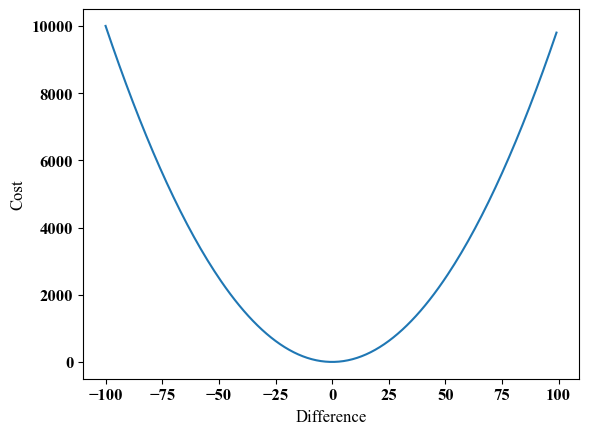

In [50]:
eps = np.arange(-100,100);plt.plot(eps,eps**2);plt.xlabel('Difference');_=plt.ylabel('Cost')

# Minimize the Total Loss with a Closed Form Solution

We need to minimize $$ \mathcal{J}(\mbf{\theta};\mbf{x},y)= \frac{1}{2} \sum_{i=1}^{n}\mathcal{L}\big(y_{i}, f_{\boldsymbol{\theta}}(\mbf{x}_i)\big)$$  so to find:

$$\mbf{\theta}^{\star} = \arg\min_{\mbf{\theta}} \mathcal{J}(\mbf{\theta};\mbf{x},y) $$

# Explicit Cost

$$ \mathcal{J}(\mbf{\theta};\mbf{x},y)= \frac{1}{2} \sum_{i=1}^{n}  (\underbrace{\bmf{\theta}^T\mbf{x}_i}_{f_{\boldsymbol{\theta}}} - y_i)^2$$

# Vectorizing the Explicit Cost

$$ \mathcal{J}(\mbf{\theta};\mbf{x},y)= \frac{1}{2} \sum_{i=1}^{n}  (\underbrace{\bmf{\theta}^T\mbf{x}_i}_{f_{\boldsymbol{\theta}}} - y_i)^2$$

We define the **design matrix** $\mbf{X} \in \mathbb{R}^{n\times (d+1)}$ and **label matrix** $\mbf{y}\in \mathbb{R}^{n\times 1} $

$$
\def\horzbar{\rule[.5ex]{2.5ex}{0.5pt}}
\mbf{X} =
\left[
  \begin{array}{ccc}
    \horzbar & \mbf{x}^{T}_{1} & \horzbar \\
    \horzbar & \mbf{x}^{T}_{2} & \horzbar \\
             & \vdots    &          \\
    \horzbar & \mbf{x}^{T}_{n} & \horzbar
  \end{array}
\right]
\; \qquad
\mbf{y} =
\left[
  \begin{array}{c}
    {y}_{1} \\
    {y}_{2} \\
    \vdots \\
    {y}_{n} \\
  \end{array}
\right]
$$

The parameters $\bmf{\theta} \in \mathbb{R}^{d+1}$ are:

$$
\bmf{\theta} =
\left[
  \begin{array}{c}
    \theta_{0} \\
    \theta_{1} \\
    \vdots \\
    \theta_{d} \\
  \end{array}
\right]
$$

# Vectorizing the Explicit Cost

$$ \underbrace{\mbf{X}}_{\mathbb{R}^{n\times (d+1)}}
\underbrace{\bmf{\theta}}_{\mathbb{R}^{(d+1)\times1}} - \underbrace{\mbf{y}}_{\mathbb{R}^{n}}$$


$$ \underbrace{\mbf{X}
\bmf{\theta}}_{\mathbb{R}^{n}} - \underbrace{\mbf{y}}_{\mathbb{R}^{n}}$$

$$
\mbf{X}\bmf{\theta} - \mbf{y} =
\left[
  \begin{array}{ccc}
    & \mbf{x}^{T}_{1}\bmf{\theta} - y_1 &  \\
     & \mbf{x}^{T}_{2}\bmf{\theta} - y_2 &  \\
             & \vdots    &          \\
     & \mbf{x}^{T}_{n}\bmf{\theta} - y_n & 
  \end{array}
\right]
$$

# Vectorizing the Explicit Cost

$$\mathcal{J}(\mbf{\theta};\mbf{X},\mbf{y})= \frac{1}{2} \big(\mbf{X}\bmf{\theta} - \mbf{y} \big)^T\big(\mbf{X}\bmf{\theta} - \mbf{y} \big) = \frac{1}{2} \sum_{i=1}^{n}  (\underbrace{\bmf{\theta}^T\mbf{x}_i}_{f_{\boldsymbol{\theta}}} - y_i)^2$$

# Solve it 

Set the gradient to zero to find **critical points**: 

$$\nabla_{\mbf{\theta}} \mathcal{J}(\mbf{\theta};\mbf{X},\mbf{y}) = 0$$

$$\nabla_{\mbf{\theta}} \frac{1}{2} \big(\mbf{X}\bmf{\theta} - \mbf{y} \big)^T\big(\mbf{X}\bmf{\theta} - \mbf{y} \big) = 0 $$

For now forget the "equal to zero":

$$\nabla_{\mbf{\theta}} \frac{1}{2} \big[ (\mbf{X}\bmf{\theta})^T(\mbf{X}\bmf{\theta}) - \underbrace{(\mbf{X}\bmf{\theta})^T\mbf{y}}_{\text{scalar}} -  \underbrace{\mbf{y}^T(\mbf{X}\bmf{\theta})}_{\text{scalar}}  + \mbf{y}^T\mbf{y}) \big] $$

$$\nabla_{\mbf{\theta}} \frac{1}{2} \big[ (\mbf{X}\bmf{\theta})^T(\mbf{X}\bmf{\theta}) - 2\bmf{\theta}^T(\mbf{X}^T\mbf{y})  + \mbf{y}^T\mbf{y}) \big] $$

$$\nabla_{\mbf{\theta}} \frac{1}{2} \big[ \bmf{\theta}^T(\mbf{X}^T\mbf{X})\bmf{\theta} - 2\bmf{\theta}^T(\mbf{X}^T\mbf{y})  + \mbf{y}^T\mbf{y}) \big] $$

$$ \frac{1}{2} \big[ 2\mbf{X}^T\mbf{X}\bmf{\theta} - 2\mbf{X}^T\mbf{y} \big]$$

# Set the gradient to zero

$$ \frac{1}{2} \big[ 2\mbf{X}^T\mbf{X}\bmf{\theta} - 2\mbf{X}^T\mbf{y} \big] = 0$$

### To get the normal equation

$$\mbf{X}^T\mbf{X}\bmf{\theta} = \mbf{X}^T\mbf{y}$$

# Final Least Squares solution

Assumes $\mbf{X}^T\mbf{X}$ is **invertible**:

$$\bmf{\theta} = \underbrace{(\mbf{X}^T\mbf{X})^{-1}\mbf{X}^T}_{\text{pseudo inverse}}\mbf{y} = \mbf{X}^{+}\mbf{y}$$ 
where:

$$ \mbf{X}^{+} \doteq (\mbf{X}^T\mbf{X})^{-1}\mbf{X}^T$$


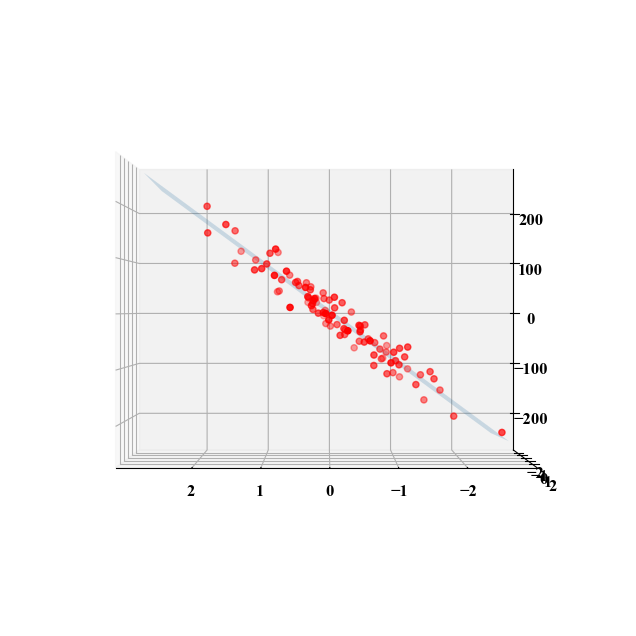

In [51]:
%matplotlib inline
%matplotlib inline
from sklearn import linear_model, datasets
from matplotlib import pyplot as plt
import numpy as np

n_samples = 100
size = 8

X, y, coef_gt = datasets.make_regression(
    n_samples=n_samples,
    n_features=2,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42,
)
fig = plt.figure(figsize=(size, size))
ax = fig.add_subplot(projection='3d')
# Linear Regression
bias = np.ones((X.shape[0], 1))
X = np.hstack((X, bias))
theta = np.linalg.inv(X.T@X)@X.T@y
# Now MeshGrid
Xmin, Xmax = X.min(), X.max()
support = np.linspace(Xmin, Xmax, 10)
xx, yy = np.meshgrid(support, support)
data = np.stack((xx, yy), axis=2)
data = data.reshape(-1, 2)
data = np.hstack((data, np.ones((data.shape[0], 1))))
z = np.dot(theta, data.T)
z = z.reshape(xx.shape)
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(X[..., 0], X[..., 1], y, c='red', marker='o')
ax.view_init(0, 90)

# Debugging the Coefficients

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^d\theta_i\cdot x_i = \bmf{\theta}^T\mbf{x} $$



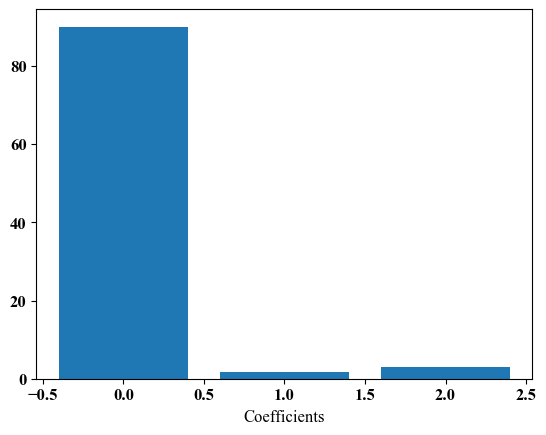

In [52]:
%matplotlib inline
plt.figure()
plt.bar(list(range(theta.size)),theta); plt.xlabel('Coefficients');

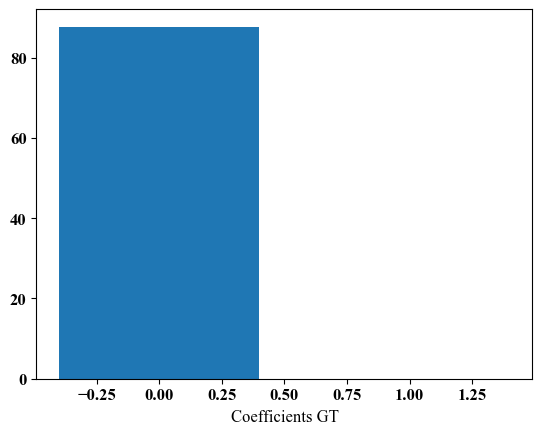

In [53]:
%matplotlib inline
plt.figure()
plt.bar(list(range(coef_gt.size)),coef_gt); plt.xlabel('Coefficients GT');

# Important: The distance is NOT orthogonal

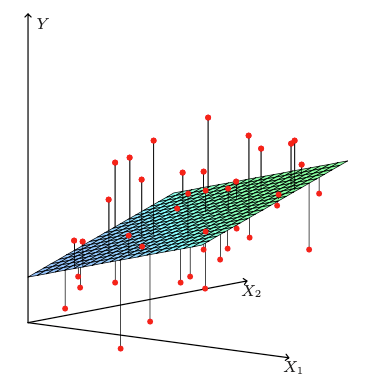

# Important: The distance is NOT orthogonal (1D case)
<br/>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/1024px-Linear_least_squares_example2.svg.png" width='30%' /></center>

# Interpretation as solving an overdetermined Linear System ($n\gg d$)

Assumes $\mbf{X}^T\mbf{X}$ is **invertible** (full rank) and $n\gg d$:

$$\bmf{\theta} = \underbrace{(\mbf{X}^T\mbf{X})^{-1}}_{d\times d}\underbrace{\mbf{X}^T}_{d\times n}\underbrace{\mbf{y}}_{n\times 1}$$


### The normal equation gives you  a way to invert $\mbf{X}^T\mbf{X}$

$$\mbf{X}^T\mbf{X}\bmf{\theta} = \mbf{X}^T\mbf{y}$$

it solves the linear system so that the plane best fits all the points with a trade-off given by the square of the residuals **(least squares)**.

# What happens if $n=d+1$?

$$\underbrace{\mbf{X}}_{n\times n} \bmf{\theta}= \mbf{y}$$

We can invert it "directly"

$$\bmf{\theta} = \mbf{X}^{-1}\mbf{y}$$

Why? $$ (\mbf{A}\mbf{B})^{-1} = (\mbf{B}^{-1}\mbf{A}^{-1}) $$ then:

$$\bmf{\theta} = (\mbf{X}^T\mbf{X})^{-1}\mbf{X}^T\mbf{y} =  \mbf{X}^{-1}(\mbf{X}^T)^{-1}\mbf{X}^T\mbf{y} = \mbf{X}^{-1}\mbf{y}$$

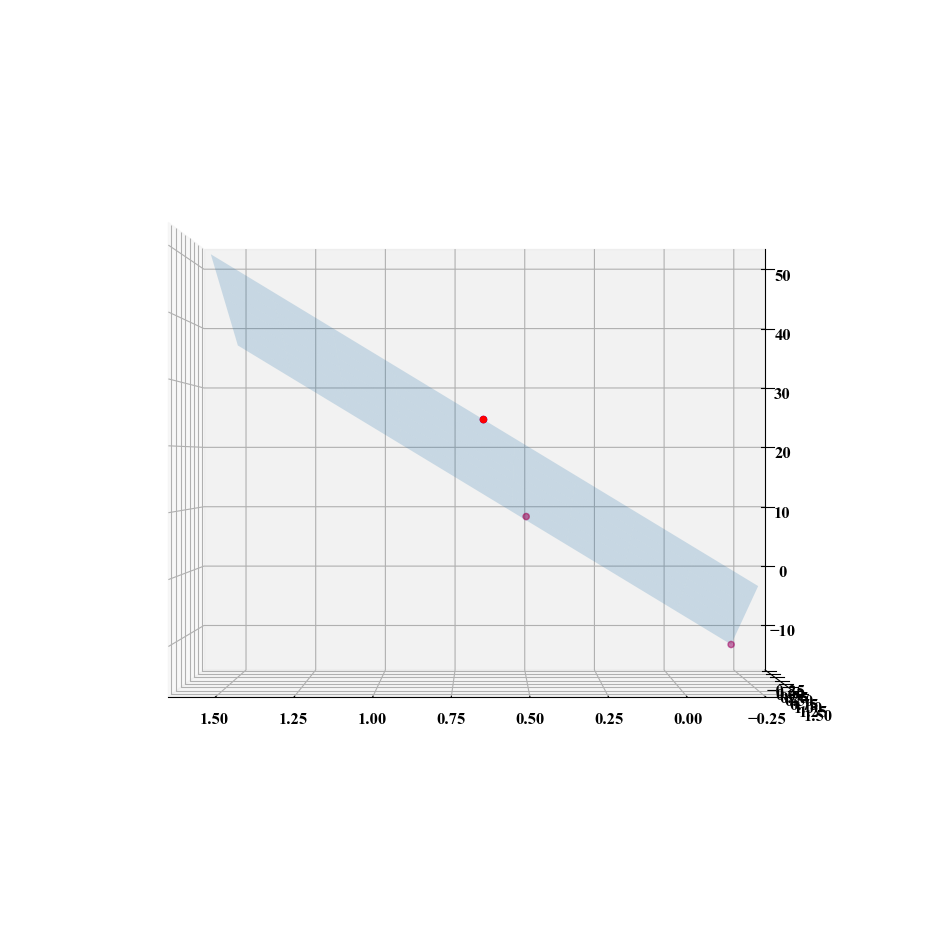

In [54]:
%matplotlib inline
from sklearn import linear_model, datasets
from matplotlib import pyplot as plt
import numpy as np

n_samples = 3
size = 12

X, y, coef_gt = datasets.make_regression(
    n_samples=n_samples,
    n_features=2,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42,
)
fig = plt.figure(figsize=(size, size))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[..., 0], X[..., 1], y, c='blue', marker='o')
# Linear Regression
bias = np.ones((X.shape[0], 1))
X = np.hstack((X, bias))
theta = np.linalg.inv(X)@y
# Now MeshGrid
Xmin, Xmax = X.min(), X.max()
support = np.linspace(Xmin, Xmax, 10)
xx, yy = np.meshgrid(support, support)
data = np.stack((xx, yy), axis=2)
data = data.reshape(-1, 2)
data = np.hstack((data, np.ones((data.shape[0], 1))))
z = np.dot(theta, data.T)
z = z.reshape(xx.shape)
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(X[..., 0], X[..., 1], y, c='red', marker='o')
ax.view_init(0, 90)

# What happens if $n=d$?

We see the plane passes exactly through the "training points".

# Probabilistic Interpretation

# Probabilistic Interpretation for Linear Regression


To go probabilistic, we have to make an assumption that each $y$ is generated linearly but with **additive Gaussian Noise.**

So

$$ y_i = \bmf{\theta}^T\mbf{x}_i + \epsilon$$ 
where
 $$ \epsilon = \mathcal{N}(0,\sigma^2)$$

- We observe $(\mbf{x}_i, y_i)$ but we do not know $\bmf{\theta}$ and the noise $\epsilon$.
- The noise changes from sample to sample but we know it is distributed as Gaussian.

# Probabilistic Interpretation for Linear Regression


To go probabilistic, we have to make an assumption that each $y$ is generated linearly but with **additive Gaussian Noise.**

So

$$ \epsilon = y_i - \bmf{\theta}^T\mbf{x}_i \sim \mathcal{N}(0,\sigma^2)$$

- We observe $(\mbf{x}, y_i)$ but we do not know $\bmf{\theta}$ and the noise $\epsilon$.
- The noise changes from sample to sample but we know it is distributed as Gaussian.

# What does the noise look like?

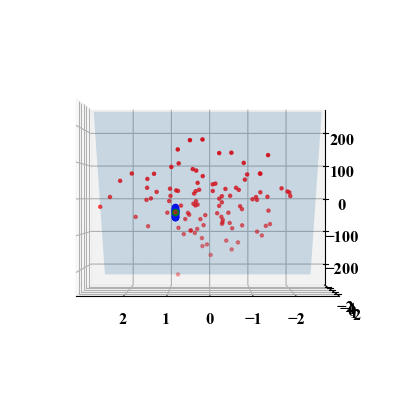

In [55]:
%matplotlib inline
from sklearn import linear_model, datasets
from matplotlib import pyplot as plt
import numpy as np

n_samples = 100
size = 5

X, y, coef_gt = datasets.make_regression(
    n_samples=n_samples,
    n_features=2,
    n_informative=1,
    noise=0,
    coef=True,
    random_state=42,
)
fig = plt.figure(figsize=(size, size))
ax = fig.add_subplot(projection='3d')
# Linear Regression
bias = np.ones((X.shape[0], 1))
X = np.hstack((X, bias))
theta = np.linalg.inv(X.T@X)@X.T@y
# Now MeshGrid
Xmin, Xmax = X.min(), X.max()
support = np.linspace(Xmin, Xmax, 10)
xx, yy = np.meshgrid(support, support)
data = np.stack((xx, yy), axis=2)
data = data.reshape(-1, 2)
data = np.hstack((data, np.ones((data.shape[0], 1))))
z = np.dot(theta, data.T)
z = z.reshape(xx.shape)
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(X[..., 0], X[..., 1], y, c='red', marker='.')
ax.view_init(0, 90)
ey = y[0]
yn = ey + np.random.randn(20)*10
for yns in yn:
    ax.scatter(X[0, 0], X[0, 1], yns, c='blue', marker='o')
ax.scatter(X[0, 0], X[0, 1], ey, c='green', marker='o');

# What does the noise look like?
<br/>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/1024px-Linear_least_squares_example2.svg.png" width='30%' /></center>

# Probabilistic Interpretation for Linear Regression


To go probabilistic, we have to make an assumption that each $y$ is generated linearly but with **additive Gaussian Noise.**

So

$$ \epsilon_i = y_i - \bmf{\theta}^T\mbf{x}_i \sim \mathcal{N}(0,\sigma^2)$$

which means the **errors behave IID from a Normal Distribution.**


$$
p\left(\epsilon_i\right)=\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\epsilon_i^{2}}{2 \sigma^{2}}\right)
$$

# Probabilistic Interpretation for Linear Regression

We look at the conditional probability of $y$ given $\mbf{x}$ aka $p(y|\mbf{x}; \bmf{\theta})$:

$$
p\left(y_i \mid x_i ; \theta\right)=\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\left(y_i-\theta^{T} x_i\right)^{2}}{2 \sigma^{2}}\right)
$$

now is function of $y$ yet centered on $\theta^{T} x_i$:
$$
y_i \mid x_i ; \theta \sim \mathcal{N}\left(\theta^{T} x_i, \sigma^{2}\right)
$$

# Estimate $\bmf{\theta}$ by Maximum Likelihood (MLE)

For a single training point:

$$
p\left(y_i \mid x_i ; \theta\right) \doteq L(\bmf{\theta};\mbf{x}_i,y_i) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\left(y_i-\theta^{T} x_i\right)^{2}}{2 \sigma^{2}}\right)
$$

# Estimate $\bmf{\theta}$ by Maximum Likelihood (MLE)

For multiple training point $\{\mbf{x}_i,y_i\}$, given IID assumptions on $\epsilon$ and thus $y|x$

$$
\begin{aligned}
L(\theta) &=\prod_{i=1}^{n} p\left(y^{(i)} \mid x^{(i)} ; \theta\right) \\
&=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2}}{2 \sigma^{2}}\right)
\end{aligned}
$$

# Maximizing the Log Likelihood (MLE)

$$
\begin{aligned}
\ell(\theta) &=\log L(\theta) \\
&=\log \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2}}{2 \sigma^{2}}\right) \\
&=\sum_{i=1}^{n} \log \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2}}{2 \sigma^{2}}\right) \\
&=n \log \frac{1}{\sqrt{2 \pi} \sigma}-\frac{1}{\sigma^{2}} \cdot \frac{1}{2} \sum^{n}\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2}
\end{aligned}
$$

# Maximizing the Log Likelihood (MLE) equals Minimizing the Squared Loss
#### (Under the assumption that the errors will have distributions as Gaussians)


$$\arg\max_{\bmf{\theta}} n \log \frac{1}{\sqrt{2 \pi} \sigma}-\frac{1}{\sigma^{2}} \cdot \frac{1}{2} \sum^{n}\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2} \rightarrow \arg\min_{\bmf{\theta}} \frac{1}{2} \sum_{i=1}^{n}\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2} $$


```To summarize: Under the previous probabilistic assumptions on the data,
least-squares regression corresponds to finding the maximum likelihood estimate of θ. This is thus one set of assumptions under which least-squares regression can be justified as a very natural method that’s just doing maximum likelihood estimation.```

(Note however that the probabilistic assumptions are
by no means necessary for least-squares to be a perfectly good and rational
procedure, and there may—and indeed there are—other natural assumptions
that can also be used to justify it.)

# Let's assume we could not find a closed form solution but we know how to program plus a bit of calculus, can we still solve Linear Regression?

# We cannot derive a closed form solution...

We need to minimize $$ \mathcal{J}(\mbf{\theta};\mbf{x},y)= \frac{1}{2} \sum_{i=1}^{n}\mathcal{L}\big(y_{i}, f_{\boldsymbol{\theta}}(\mbf{x}_i)\big)$$  so to find:

$$\mbf{\theta}^{\star} = \arg\min_{\mbf{\theta}} \mathcal{J}(\mbf{\theta};\mbf{x},y) $$

# 👋🏼 Closed Form Solution; 🤗 Iterative Methods

In general, if you can find a closed form solution, that is **the best you can do.**

<ins>So if your problem is as simple as inverting a linear system, please **invert a linear system and use pseudo-inverse if you need to!**</ins>

In case you cannot derive, we can use **numerical, iterative methods**

# A very simple yet effective Iterative method is <ins>Gradient Descent</ins>

- This part that we explain now starts to be propaedeutic for **Deep Learning**.

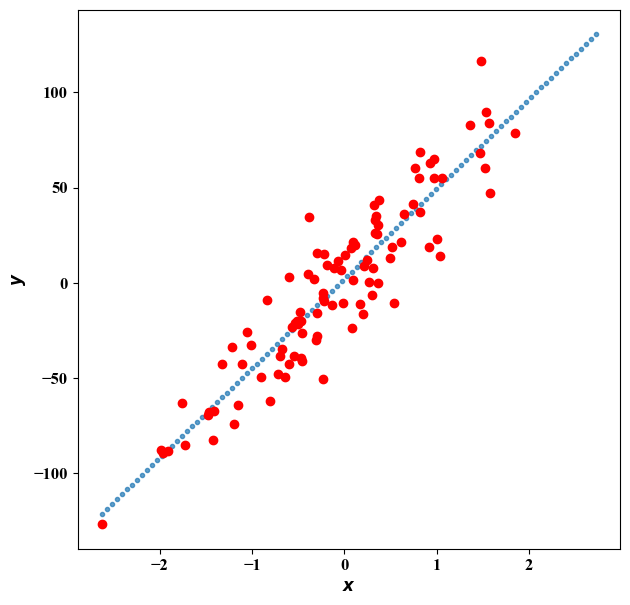

In [83]:
%matplotlib inline
from sklearn import linear_model, datasets
from matplotlib import pyplot as plt
import numpy as np

n_samples = 100
size = 7

X, y, coef_gt = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42,
)
fig = plt.figure(figsize=(size, size))
ax = fig.add_subplot()
# Linear Regression
bias = np.ones((X.shape[0], 1))
X = np.hstack((X, bias))
theta = np.linalg.inv(X.T@X)@X.T@y
# Now MeshGrid
x_interp = np.linspace(Xmin, Xmax, 100)
x_interp = x_interp.reshape(-1,1)
x_interp = np.c_[x_interp,np.ones_like(x_interp)]
y_interp = np.dot(theta, x_interp.T)
ax.scatter(x_interp[:,0], y_interp, alpha=0.7, marker='.')
ax.scatter(X[..., 0], y, c='red', marker='o')
ax.set_xlabel('$x$');
ax.set_ylabel('$y$');

In [84]:
# do mesh grid on possible theta, evaluate the loss and plot the countf
theta_sampling = 50
theta_space = np.linspace(-200, 200, theta_sampling)
xxt, yyt = np.meshgrid(theta_space, theta_space)
xxt = xxt.flatten()
yyt = yyt.flatten()
all_coeff = np.stack((xxt, yyt), axis=1)
loss = 0.5*1

In [85]:
losses = []
for coeff in all_coeff:
    diff = np.dot(X, coeff.T) - y
    losses.append(0.5*np.dot(diff.T, diff))
losses = np.array(losses)
losses = losses.reshape(theta_sampling, theta_sampling)
xxt = xxt.reshape(theta_sampling, theta_sampling)
yyt = yyt.reshape(theta_sampling, theta_sampling)

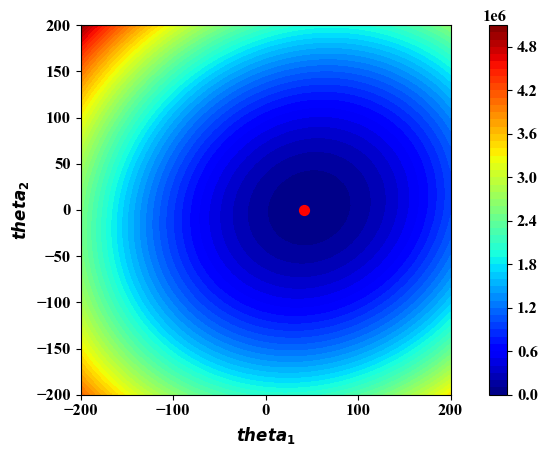

In [86]:
plt.rcParams['axes.grid'] = False
plt.contourf(xxt, yyt, losses, levels=50, cmap='jet')
plt.colorbar()
plt.scatter(coef_gt, 0, color='red', marker='o', s=50)
plt.axis('scaled')
plt.xlabel('$theta_1$')
plt.ylabel('$theta_2$');

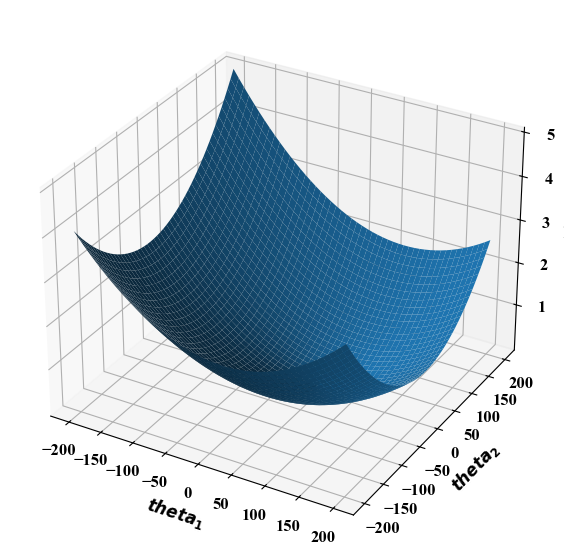

In [87]:
%matplotlib inline
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xxt, yyt, losses)
ax.set_xlabel('$theta_1$')
ax.set_ylabel('$theta_2$')
ax.set_zlabel('loss')
plt.show()


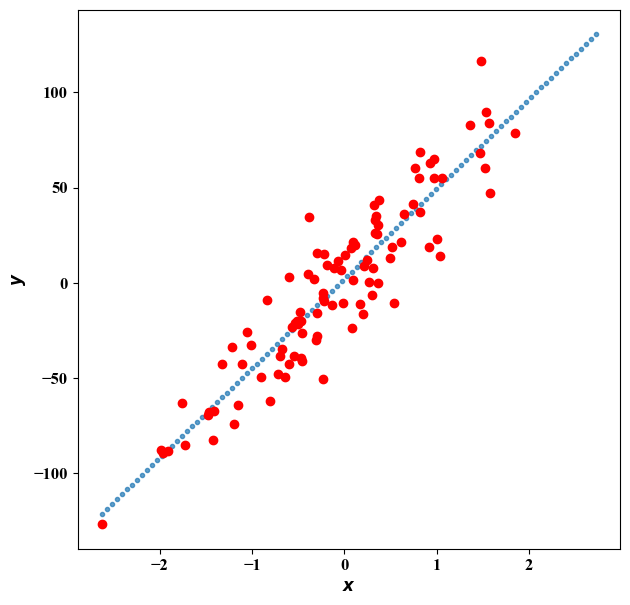

In [88]:
%matplotlib inline
from sklearn import linear_model, datasets
from matplotlib import pyplot as plt
import numpy as np

n_samples = 100
size = 7

X, y, coef_gt = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42,
)
fig = plt.figure(figsize=(size, size))
ax = fig.add_subplot()
# Linear Regression
bias = np.ones((X.shape[0], 1))
X = np.hstack((X, bias))
theta = np.linalg.inv(X.T@X)@X.T@y
# Now MeshGrid
x_interp = np.linspace(Xmin, Xmax, 100)
x_interp = x_interp.reshape(-1,1)
x_interp = np.c_[x_interp,np.ones_like(x_interp)]
y_interp = np.dot(theta, x_interp.T)
ax.scatter(x_interp[:,0], y_interp, alpha=0.7, marker='.')
ax.scatter(X[..., 0], y, c='red', marker='o')
ax.set_xlabel('$x$');
ax.set_ylabel('$y$');

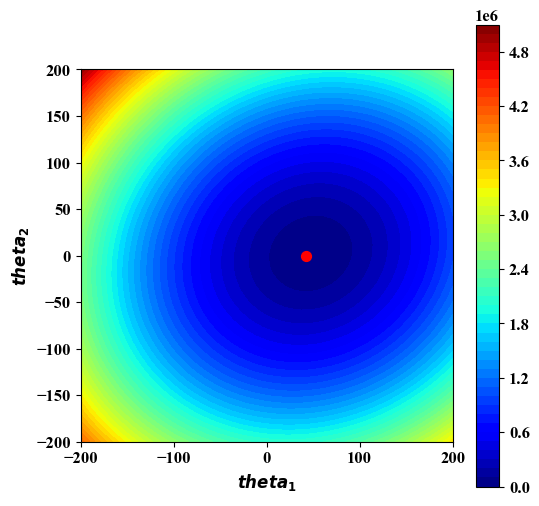

In [89]:
fig = plt.figure(figsize=(size-1, size-1))
plt.rcParams['axes.grid'] = False
plt.contourf(xxt, yyt, losses, levels=50, cmap='jet');
plt.colorbar()
plt.scatter(coef_gt,0,color='red',marker='o',s=50)
plt.axis('scaled')
plt.xlabel('$theta_1$')
plt.ylabel('$theta_2$');

# Ready for an awesome demo?

[46.09610615] [1.80913084]


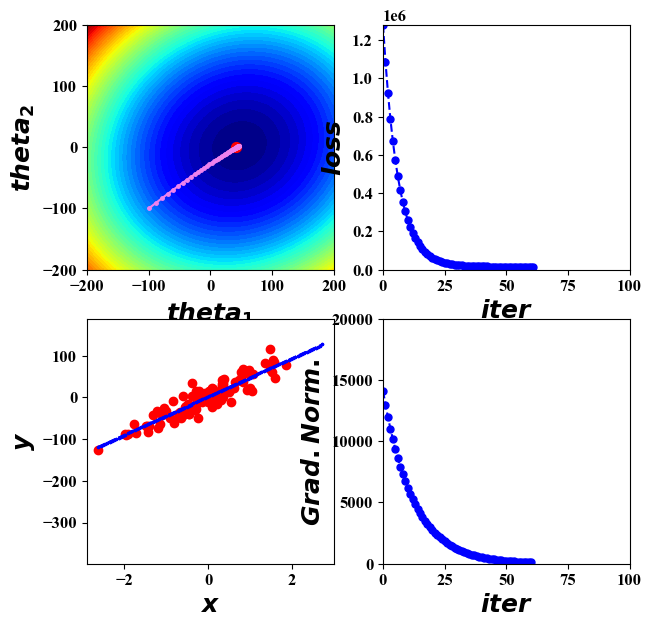

In [90]:
## Implementation of Gradient Descent for Logistic Regression

import time
%matplotlib inline


def get_diff(X, theta, y):
    return X@theta - y[..., np.newaxis]


def get_loss(diff): 
    return 0.5*np.dot(diff.T, diff)


def plot_line(plot3, theta):
    x_interp = np.linspace(Xmin, Xmax, 100)
    x_interp = x_interp.reshape(-1, 1)
    x_interp = np.c_[x_interp, np.ones_like(x_interp)]
    y_interp = np.dot(x_interp, theta)
    if plot3:
        plot3.set_xdata(x_interp[:, 0])
        plot3.set_ydata(y_interp)
    else:
        return x_interp, y_interp


plt.ion()
figure, (axes_1, axes_2) = plt.subplots(2, 2, figsize=(7, 7))
plt.rcParams['axes.grid'] = False
ax0, ax1 = axes_1
ax2, ax3 = axes_2
ax0.contourf(xxt, yyt, losses, levels=50, cmap='jet')
ax0.scatter(coef_gt, 0, color='red', marker='o', s=50)
ax0.set_xlabel('$theta_1$',fontsize=18)
ax0.set_ylabel('$theta_2$',fontsize=18)
ax1.set_ylabel('$loss$',fontsize=18)
ax1.set_xlabel('$iter$',fontsize=18)
ax1.set(xlim=(0, 100), ylim=(0, 1.28e6))
ax2.scatter(X[..., 0], y, c='red', marker='o')
ax2.set_xlabel('$x$',fontsize=18)
ax2.set_ylabel('$y$',fontsize=18)
ax3.set_ylabel('$Grad. Norm.$',fontsize=18)
ax3.set_xlabel('$iter$',fontsize=18)
ax3.set(xlim=(0, 100), ylim=(0, 20000))

theta_curr = np.array([[-100, -100]]).T
losses_track = [get_loss(get_diff(X, theta_curr, y))]
grad_norm_track = [1000]

theta_track = np.array(theta_curr)
lr = 1e-3
loss_tol = 10

plot1, = ax0.plot(*theta_curr, color='violet',
                  marker='.', markersize=5, linestyle='-')
plot2, = ax1.plot(*losses_track, color='blue',
                  marker='.', markersize=10, linestyle='--')
xi, yi = plot_line(None, theta_curr)
plot3a,plot3b = ax2.plot(xi, yi, color='blue', marker='.',
                  markersize=3, linestyle='--')
plot4, = ax3.plot(1000, color='blue',
                  marker='.', markersize=10, linestyle='--')
while True:
    diff = get_diff(X, theta_curr, y)
    grad = (diff * X).sum(axis=0, keepdims=True).T
    theta_curr = theta_curr - lr*grad
    theta_track = np.append(theta_track, theta_curr, axis=1)
    diff = get_diff(X, theta_curr, y)
    losses_track.append(get_loss(diff))
    grad_norm_track.append(np.linalg.norm(grad,2))
    if abs(losses_track[-2]-losses_track[-1]) < loss_tol:
        break
    plot1.set_xdata(theta_track[0, :])
    plot1.set_ydata(theta_track[1, :])
    plot2.set_xdata(range(len(losses_track)))
    plot2.set_ydata(losses_track)
    plot4.set_xdata(range(len(grad_norm_track[1:])))
    plot4.set_ydata(grad_norm_track[1:])
    plot_line(plot3a, theta_curr)
    plot_line(plot3b, theta_curr)
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.1)
print(*theta_curr)
plt.show()

# Gradient Descent (GD)


$$ \mathcal{J}(\mbf{\theta};\mbf{x},y)= \frac{1}{2} \sum_{i=1}^{n}\mathcal{L}\big(y_{i}, f_{\boldsymbol{\theta}}(\mbf{x}_i)\big)$$ 
where

$$\mathcal{L}\big(y, f_{\boldsymbol{\theta}}(\mbf{x})\big) = \big(f_{\boldsymbol{\theta}}(\mbf{x}) - y \big)^2 $$


$$\bmf{\hat{\theta}} = \arg \min_{\bmf{\theta}} \frac{1}{2} \sum_{i=1}^n \big(f_{\boldsymbol{\theta}}(\mbf{x}_i) - y_i \big)^2 $$

# Analysis

<br><br>
The function $\mathcal{J}(\mbf{\theta};\mbf{x},y)$ is a **convex quadratic function**. The Hessian of $\mathcal{J}(\mbf{\theta};\mbf{x},y)$ at any vector $\theta$ is
the positive definite matrix $\mbf{X}^T\mbf{X}$. Since $\mathcal{J}$ is lower bounded and
grows at infinity, there is a minimum.

- if $\operatorname{rank}({\mbf{X}}) =\min\{d,n\}$ then $\mbf{X}^T\mbf{X}$ is  strictly positive definite. In this case the error function $\mathcal{J}$ is strictly convex, so the **minimum is unique (Ball Shape)**
- if $\operatorname{rank}({\mbf{X}}) < \min\{d,n\}$ then $\mathcal{J}$ is not strictly convex and the minimum
is not unique

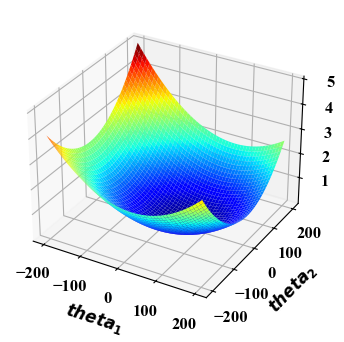

In [64]:
plt.rcParams['axes.grid'] = False
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xxt, yyt, losses, cmap='jet')
ax.set_xlabel('$theta_1$')
ax.set_zlabel('$J$')
ax.set_ylabel('$theta_2$');

# Gradient Descent Algorithm as an Iterative Method

<ins>**Idea: make a little step so that locally after each step the cost is lower than before**</ins><br>
Input: Training set $\{\mbf{x}_i,y_i\}$, learning rate  $\gamma$, a small value in $\{0.1,\ldots,\texttt{1e-6}\}$.

1. **Initialization - Very Important if the function is not strictly convex** 

$$\bmf{\theta} \doteq \mbf{0}^T$$ 
Set it to all zeros or random initialization from a distribution.
|
2. Repeat until **convergence**:
    - Compute the gradient of the loss wrt the parameters $\bmf{\theta}$ given **all the training set**
    - Take a small step in the opposite direction of steepest ascent **(so steepest descent).**<br/><br/>
     $$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma \bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x},y)$$
3. When convergence is reached, your final estimate is in $\bmf{\theta}$

# Convergence

$$\big\{\bmf{\theta}_{t=0},\bmf{\theta}_{t=1}, \ldots, \bmf{\theta}_{t=100} \big\}$$

### 0) <ins>Always:</ins> validation loss/metric _(early stopping)_ (required)

### 1) No significant decrease in the loss function (preferred)

$$\mid \mathcal{J}(\mbf{\theta};\mbf{x},y)_{t} - \mathcal{J}(\mbf{\theta};\mbf{x},y)_{t-1}   \mid $$

### 1) No variations in the parameters

$$\mid\mid \mbf{\theta}_{t} - \mbf{\theta}_{t-1}   \mid\mid $$

### 2) Gradient Norm goes to zero

$$\mid\mid \bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x},y)   \mid\mid \rightarrow 0 $$


# Gradient Descent on Linear Regression

1. Initialization $$\bmf{\theta} \sim \texttt{random}~~\text{or zero}$$ 
2. $$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma \bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x},y)$$

$$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma \bmf{\nabla}_{\bmf{\theta}}  \frac{1}{2} \sum_{i=1}^n \big(\bmf{\theta}^T\mbf{x} - y \big)^2 $$

$$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma  \frac{1}{2} \sum_{i=1}^n \big(2\bmf{\theta}^T\mbf{x}\mbf{x} - 2y\mbf{x} \big) $$

$$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma \sum_{i=1}^n \big(\bmf{\theta}^T\mbf{x}_i- y_i\big)\mbf{x}_i$$

# Dimension Check

Summing up over ${\mbf{x}_i \in \mathbb{R}^d}$ scaled by the difference between the prediction and ground-truth

$$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma \sum_{i=1}^n \big(\underbrace{\bmf{\theta}^T\mbf{x}_i- y_i\big)}_{\text{scalar}}\underbrace{\mbf{x}_i}_{\mathbb{R}^d}$$

# Stochastic Gradient Descent (SGD)

**Problem of GD**: What happens if $n \mapsto \infty$. 

To make a small step we have to go through **ALL the training samples**. Optimization could be slow for large $n$.

**Idea: make an update for each single training sample selected randomly**

$$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma  \big(\underbrace{\bmf{\theta}^T\mbf{x}_i- y_i\big)}_{\text{scalar}}\underbrace{\mbf{x}_i}_{\mathbb{R}^d} \qquad \text{where} \qquad  i\sim \mathcal{U}(0,n)$$


[Many Variations of SGD](https://sebastianraschka.com/faq/docs/sgd-methods.html)

# Let's see the dynamic of SGD!
## Another demo

[42.27801342] [-3.01691851]


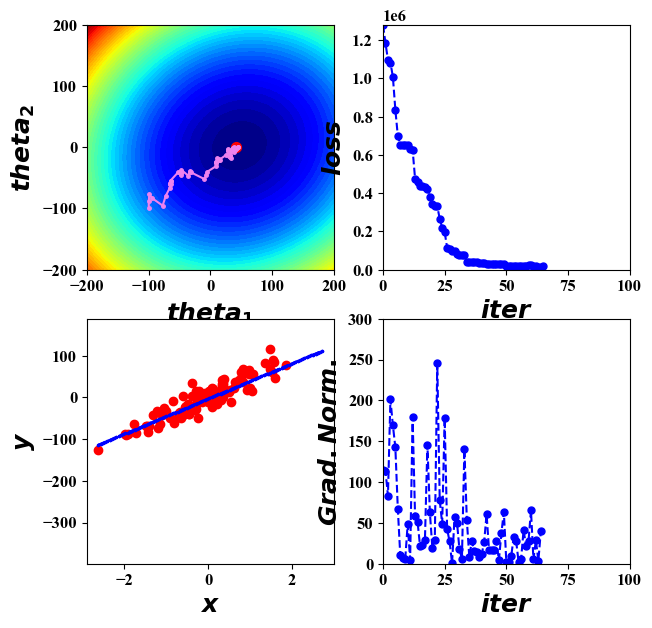

In [65]:
# Implementation of Stochastic Gradient Descent for Logistic Regression

import time
%matplotlib inline


def get_diff(X, theta, y):
    return X@theta - y[..., np.newaxis]


def get_loss(diff):
    return 0.5*np.dot(diff.T, diff)


def plot_line(plot3, theta):
    x_interp = np.linspace(Xmin, Xmax, 100)
    x_interp = x_interp.reshape(-1, 1)
    x_interp = np.c_[x_interp, np.ones_like(x_interp)]
    y_interp = np.dot(x_interp, theta)
    if plot3:
        plot3.set_xdata(x_interp[:, 0])
        plot3.set_ydata(y_interp)
    else:
        return x_interp, y_interp


plt.ion()
figure, (axes_1, axes_2) = plt.subplots(2, 2, figsize=(7, 7))
plt.rcParams['axes.grid'] = False
ax0, ax1 = axes_1
ax2, ax3 = axes_2
ax0.contourf(xxt, yyt, losses, levels=50, cmap='jet')
ax0.scatter(coef_gt, 0, color='red', marker='o', s=50)
ax0.set_xlabel('$theta_1$', fontsize=18)
ax0.set_ylabel('$theta_2$', fontsize=18)
ax1.set_ylabel('$loss$', fontsize=18)
ax1.set_xlabel('$iter$', fontsize=18)
ax1.set(xlim=(0, 100), ylim=(0, 1.28e6))
ax2.scatter(X[..., 0], y, c='red', marker='o')
ax2.set_xlabel('$x$', fontsize=18)
ax2.set_ylabel('$y$', fontsize=18)
ax3.set_ylabel('$Grad. Norm.$', fontsize=18)
ax3.set_xlabel('$iter$', fontsize=18)
ax3.set(xlim=(0, 100), ylim=(0, 300))

theta_curr = np.array([[-100, -100]]).T
losses_track = [get_loss(get_diff(X, theta_curr, y))]
grad_norm_track = [1000]

theta_track = np.array(theta_curr)
lr = 1e-1
loss_tol = 10
np.random.seed(42)

plot1, = ax0.plot(*theta_curr, color='violet',
                  marker='.', markersize=5, linestyle='-')
plot2, = ax1.plot(*losses_track, color='blue',
                  marker='.', markersize=10, linestyle='--')
xi, yi = plot_line(None, theta_curr)
plot3a, plot3b = ax2.plot(xi, yi, color='blue', marker='.',
                          markersize=3, linestyle='--')
plot4, = ax3.plot(1000, color='blue',
                  marker='.', markersize=10, linestyle='--')
while True:
    diff = get_diff(X, theta_curr, y)
    # STOCHASTIC PART ########################
    idx_sampled = np.random.randint(n_samples)
    grad = (diff * X)[idx_sampled, :].T.reshape(-1, 1)
    ##############################
    theta_curr = theta_curr - lr*grad
    theta_track = np.append(theta_track, theta_curr, axis=1)
    diff = get_diff(X, theta_curr, y)
    losses_track.append(get_loss(diff))
    grad_norm_track.append(np.linalg.norm(grad, 2))
    if abs(losses_track[-2]-losses_track[-1]) < loss_tol:
        break
    plot1.set_xdata(theta_track[0, :])
    plot1.set_ydata(theta_track[1, :])
    plot2.set_xdata(range(len(losses_track)))
    plot2.set_ydata(losses_track)
    plot4.set_xdata(range(len(grad_norm_track[1:])))
    plot4.set_ydata(grad_norm_track[1:])
    plot_line(plot3a, theta_curr)
    plot_line(plot3b, theta_curr)
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.1)
print(*theta_curr)
plt.show()

# Stochastic Gradient Descent (SGD): lots of Variations

- Zig-Zag "Noisy" Trajectory of SGD
- Converge to a $\gamma$-ball of the solution of GD
- Increases the iterations wrt GD
- Each iteration is so fast that the speed of SGD is much higher than GD for large training set $n$.

## Notable Variations for Deep Learning

- SGD **on mini-batches** (a trade-off between SGD and GD)
- SGD **with momentum** (memory of previous state)

[Many Variations of SGD](https://sebastianraschka.com/faq/docs/sgd-methods.html)

# Artificial Intelligence and Machine Learning

## Unit II


## Polynomial Regression, Feature Maps, Ridge Regression

# Recap
## We go back to your loved 🥰 Linear Algebra
## Supervised, <ins>Parametric</ins> Models


### 1) Ordinary Linear Regression with Least Squares
### 2) Probabilistic Interpretation 
### 3) Gradient Descent "Family"

# Gradient Descent and [Stochastic] GD

1. **Initialization - Very Important if the function is not strictly convex** 
$$\bmf{\theta} \doteq \mbf{0}^T$$
Set it to all zeros or random initialization from a distribution.
2. Repeat until **convergence**:
    - Compute the gradient of the loss wrt the parameters $\bmf{\theta}$ given **all the training set**
    - Take a small step in the opposite direction of steepest ascent **(so steepest descent).**<br/><br/>
     $$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma \bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x},y)$$
3. When convergence is reached, your final estimate is in $\bmf{\theta}$


[Many Variations of SGD](https://sebastianraschka.com/faq/docs/sgd-methods.html)

# GD

$$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma \sum_{i=1}^n \big(\underbrace{\bmf{\theta}^T\mbf{x}_i- y_i\big)}_{\text{scalar}}\underbrace{\mbf{x}_i}_{\mathbb{R}^d}$$

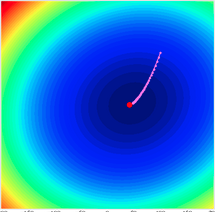

# SGD


$$\bmf{\theta} \leftarrow  \bmf{\theta} -\gamma  \big(\underbrace{\bmf{\theta}^T\mbf{x}_i- y_i\big)}_{\text{scalar}}\underbrace{\mbf{x}_i}_{\mathbb{R}^d} \qquad \text{where}~ i\sim \mathcal{U}(0,n)$$

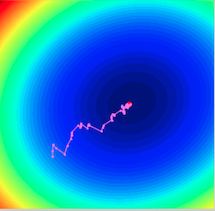

# Maximizing the Log Likelihood (MLE) equals Minimizing the Squared Loss
#### (Under the assumption that the errors will have distribution as Gaussians)


$$\arg\max_{\bmf{\theta}} n \log \frac{1}{\sqrt{2 \pi} \sigma}-\frac{1}{\sigma^{2}} \cdot \frac{1}{2} \sum^{n}\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2} \rightarrow \arg\min_{\bmf{\theta}} \frac{1}{2} \sum_{i=1}^{n}\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2} $$


```To summarize: Under the previous probabilistic assumptions on the data,
least-squares regression corresponds to finding the maximum likelihood estimate of θ. This is thus one set of assumptions under which least-squares regression can be justified as a very natural method that’s just doing maximum likelihood estimation.```

(Note however that the probabilistic assumptions are
by no means necessary for least-squares to be a perfectly good and rational
procedure, and there may—and indeed there are—other natural assumptions
that can also be used to justify it.)

# Today

## Make Linear Regression... Non-Linear
## Polynomial Regression with Basis Functions (Feature Map)
## From Feature Maps to Kernel Methods

# This lecture material is taken from

- [Mostly from Bishop - Chapter 3 page 137]()
- [Stanford notes](http://cs229.stanford.edu/summer2019/cs229-notes1.pdf)
- [Tibshirani - Chapter 4 page 43](https://hastie.su.domains/ElemStatLearn/)
- [Sklearn Polynomial Regression](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

# Linear Hypothesis

We assume relations $f \longleftrightarrow y$ is **linear**
We know $D = \{\mbf{x}_i,y_i\}_{i=1}^n$ and we want to find ${\boldsymbol{\theta}}\doteq (\theta_0,\ldots,\theta_d)$

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \theta_0+ \theta_1\cdot x_1 + \theta_2\cdot x_2 + \ldots + \theta_d\cdot x_d$$

So ${\boldsymbol{\theta}}\doteq (\theta_0,\ldots,\theta_d) \in \mathbb{R}^{d+1}$.

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \big(\sum_{i=1}^d\theta_i\cdot x_i\big) + \theta_0$$

# Trick for Notation Compactness

We can augment each feature to have a **bias (intercept term)** set to $1$ so that $\mbf{x} \doteq [1,\mbf{x}]$.

Doing so $\mbf{x} \in \mathbb{R}^{d+1}$

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \theta_0\cdot \underbrace{x_0}_{\text{always}~1} + \theta_1\cdot x_1 + \theta_2\cdot x_2 + \ldots + \theta_d\cdot x_d$$

So ${\boldsymbol{\theta}}\doteq (\theta_0,\ldots,\theta_d) \in \mathbb{R}^{d+1}$.

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^d\theta_i\cdot x_i = \bmf{\theta}^T\mbf{x} $$

# Linear Function of parameters $\bmf{\theta}$  _and_ input $\mbf{x}$

With $\mbf{x} = [1,x_1,\ldots,x_d]$ and $\mbf{\theta} = [\theta_0,\theta_1,\ldots,\theta_d]$, we have:

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^d\theta_i\cdot x_i = \bmf{\theta}^T\mbf{x} $$

# Does not capture non-linear relationships between $y$ and $\mbf{x}$

# Interpreting Linear Regression with Basis Functions


We can have another dimensionality $m$ instead of $d$ by using **Basis Functions $\bmf{\phi}(\mbf{x})$**.

With $\bmf{\phi}(\mbf{x} = [1,\phi(x_1),\ldots,\phi(x_m)]$ and $\mbf{\theta} = [\theta_0,\theta_1,\ldots,\theta_m]$, we have:

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^m\theta_i\cdot x_i = \bmf{\theta}^T\bmf{\phi}(\mbf{x}) $$

For Linear Regression:
- $m=d$, and
- the **Basis Functions** is : $\phi_m(\mbf{x}) = x_m$


# What if..

- $m \neq d$, and
- the **Basis Functions** is : $\bmf{\phi}_m(\mbf{x}) \neq x_m$

then we do not have Linear Regression, and the settings impact the model

# Think Basis Function as (Non-Linear) Transform or Feature Map

Let's consider the one dimensional case. We have already seen that we could change the feature $x$ to add the bias term $\mbf{x}\doteq [x,1]$

\begin{align}
\mbf{x} &= \begin{bmatrix}
       x \\
       1
     \end{bmatrix}
     \rightarrow \quad
   \bmf{\phi}(\mbf{x}) &= \begin{bmatrix}
       x^2\\
       x \\
       1
     \end{bmatrix}
\end{align} 

So input dimension is $d=2$ then output dimension after $\bmf{\phi}(\cdot)$ is $m=3$.

In this case we used a second order polynomial to lift up the features
$$\bmf{\phi}_m(\mbf{x}) = x^m$$

# Basis Function as Non-Linear Transform

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^m\theta_i\cdot \bmf{\phi}_i(x) = \bmf{\theta}^T\bmf{\phi}(\mbf{x}) = \theta_0  + \theta_1\cdot x +\theta_2\cdot x^2  $$

**Important observation**:
- This is still **linear function** of the parameters $\theta$, in fact we still **take the dot product**
- Though it is **NON linear function** of the features $x$

# Two Observations

- This is still <ins>**linear function**</ins> of the parameters $\theta$
    - **Good** we can solve it with Linear Regression
- Though it is <ins>**NON linear function**</ins> of the features $x$
    - **Even better**, we capture non-linearity in the data

# Polynomial Regression (Basis Function $\bmf{\phi}_m(\mbf{x}) = x^m$)

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^m\theta_i\cdot \bmf{\phi}_i(x) = \bmf{\theta}^T\bmf{\phi}(\mbf{x}) = \theta_0  + \theta_1\cdot x +\theta_2\cdot x^2  $$

**Important observation**:
- This is still **linear function** of the parameters $\theta$, in fact we still **take the dot product**
- Though it is **NON linear function** of the features $x$
- $m$ is the degree of the **Polynomial** we consider
- $m$ the higher the degree, the more expressive is the model

## Poly (Multi) Nomial (Names or Terms)

In [93]:
sigma_noise = 0.5
support_X = 10
offset_valid = 7
np.random.seed(0)

def gen_data(x, sigma):
    n_samples  = x.shape[0]
    return x*np.sin(x)+ sigma*np.random.randn(n_samples)

XX = np.random.uniform(-support_X, support_X, size=n_samples)
x = XX[:80]
x_valid = np.random.uniform(-support_X-offset_valid, support_X+offset_valid, size=20)#XX[80:]
y = gen_data(x, sigma=sigma_noise).reshape(-1,1)
y_valid = gen_data(x_valid, sigma=sigma_noise).reshape(-1,1)
x = x.reshape(-1,1)
x_valid = x_valid.reshape(-1,1)

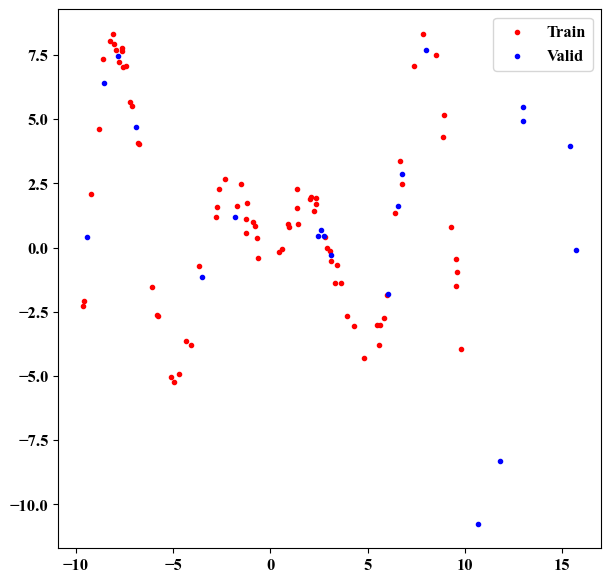

In [94]:
plt.figure(figsize=(7, 7))
_ = plt.scatter(x, y, c='red', marker='.')
_ = plt.scatter(x_valid, y_valid, c='blue', marker='.')
plt.legend(['Train', 'Valid']);

# Non-Linear Data

## Linear Hypothesis? 😬


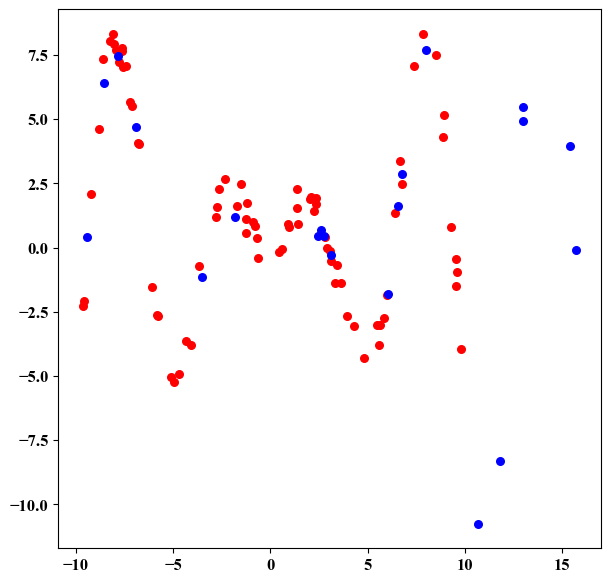

In [95]:
%matplotlib inline

plt.figure(figsize=(7,7)); plt.scatter(x,y, c='red', marker='o', s=30);_=plt.scatter(x_valid,y_valid, c='blue', marker='o', s=30)

# Now let's solve it with Linear Regression (we assume no bias)

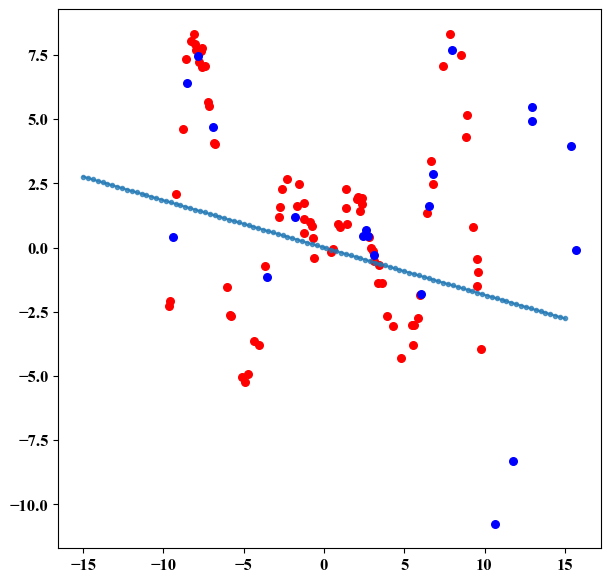

In [97]:
def solve_lstq(x, y):
    return np.linalg.inv(x.T@x)@x.T@y


plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='red', marker='o', s=30)
plt.scatter(x_valid, y_valid, c='blue', marker='o', s=30)
theta = solve_lstq(x, y)
x_interp = np.linspace(-support_X*1.5, support_X*1.5, 100).reshape(-1, 1)
y_interp = np.dot(theta, x_interp.T)
plt.plot(x_interp[:, 0], y_interp.T, alpha=0.7, marker='.');

# Let's check the training error (or fitting error)



```python 
err = np.power(y - np.dot(theta, x.T), 2).mean()
```

**Numerically it seems pretty high!**

In [98]:
print(np.power(y - np.dot(theta, x.T), 2).mean())

16.42335475440827


In [100]:
errors = []
errors.append(np.power(y - np.dot(theta, x.T), 2).mean())
errors

[16.42335475440827]

# Let's try a quadratic basis function

Let's consider the one dimensional case. We have already seen that we could change the feature $x$ to add the bias term $\mbf{x}\doteq [x,1]$

\begin{align}
\mbf{x} &= \begin{bmatrix}
       x \\
       1
     \end{bmatrix}
     \rightarrow \quad
   \bmf{\phi}(\mbf{x}) &= \begin{bmatrix}
       x^2\\
       x \\
       1
     \end{bmatrix}
\end{align} 

So input dimension is $d=1$ then output dimension after $\bmf{\phi}(\cdot)$ is $m=2$.

In this case we used a second order polynomial to lift up the features
$$\bmf{\phi}_m(\mbf{x}) = x^m$$

# The blessing of dimensionality

Let's consider the one dimensional case. We have already seen that we could change the feature $x$ to add the bias term $\mbf{x}\doteq [x,1]$

\begin{align}
\mbf{x} &= \begin{bmatrix}
       x \\
       1
     \end{bmatrix}
     \rightarrow \quad
   \bmf{\phi}(\mbf{x}) &= \begin{bmatrix}
       x^2\\
       x \\
       1
     \end{bmatrix}
\end{align} 

- In some sense this can be seen as opposite to the **curse of dimensionality**
- Though if you increase $m$ too much you may face  **curse of dimensionality** again

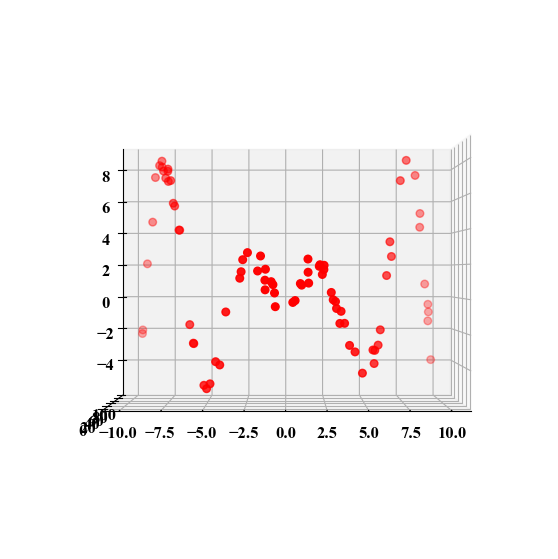

In [71]:
%matplotlib inline
xq = np.c_[x, x**2]  # make quadratic features
fig = plt.figure(figsize=(size, size))
ax = fig.add_subplot(projection='3d')
ax.scatter(xq[..., 0], xq[..., 1], y, c='red', marker='o', s=30)
ax.view_init(0, -90)

# Now we can still solve it with LS but $m=2$


We can have another dimensionality $m$ instead of $d$ by using **Basis Functions** $\bmf{\phi}(\mbf{x})$ .

With $\bmf{\phi}(\mbf{x} = [1,\phi(x_1),\ldots,\phi(x_m)]$ and $\mbf{\theta} = [\theta_0,\theta_1,\ldots,\theta_m]$, we have:

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^m\theta_i\cdot \bmf{\phi}_i(x) = \bmf{\theta}^T\bmf{\phi}(\mbf{x}) $$

For Linear Regression:
- $m > d$, and
- the **Basis Functions** is : $\phi_m(\mbf{x}) = x^m$


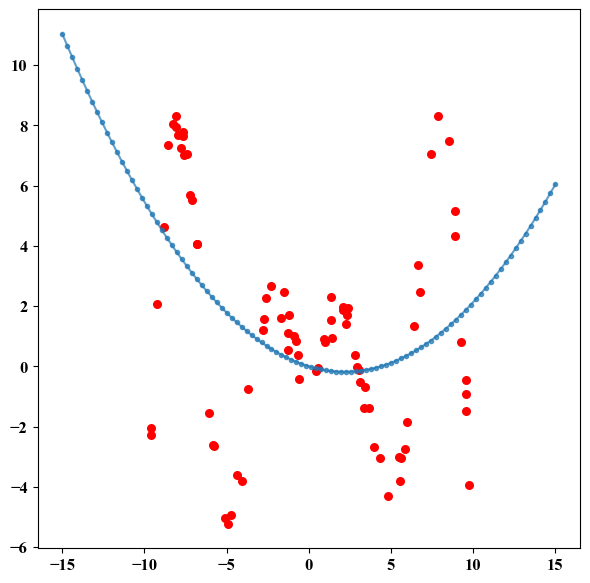

In [72]:
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='red',marker='o', s=30)
theta_q = solve_lstq(xq, y)
x_interp = np.linspace(-support_X*1.5, support_X*1.5, 100).reshape(-1, 1)
x_interp_q = np.c_[x_interp, x_interp**2]
y_interp_q = np.dot(theta_q.T, x_interp_q.T)
plt.plot(x_interp_q[:, 0], y_interp_q.T, alpha=0.7, marker='.');

# Let's check the training error (or fitting error) again


```python 
err = np.power(y - np.dot(theta_q.T, xq.T), 2).mean()
```

**Numerically it seems pretty high!**

{{print(np.power(y - np.dot(theta_q.T, xq.T), 2).mean())}}

In [73]:
errors.append(np.power(y - np.dot(theta_q.T, xq.T), 2).mean())

# Now we can still solve it with LS but $m=3$


We can have another dimensionality $m$ instead of $d$ by using **Basis Functions** $\bmf{\phi}(\mbf{x})$ .

With $\bmf{\phi}(\mbf{x} = [1,\phi(x_1),\ldots,\phi(x_m)]$ and $\mbf{\theta} = [\theta_0,\theta_1,\ldots,\theta_m]$, we have:

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^m\theta_i\cdot \bmf{\phi}_i(x) = \bmf{\theta}^T\bmf{\phi}(\mbf{x}) $$

For Linear Regression:
- $m > d$, and
- the **Basis Functions** is : $\phi_m(\mbf{x}) = x^m$


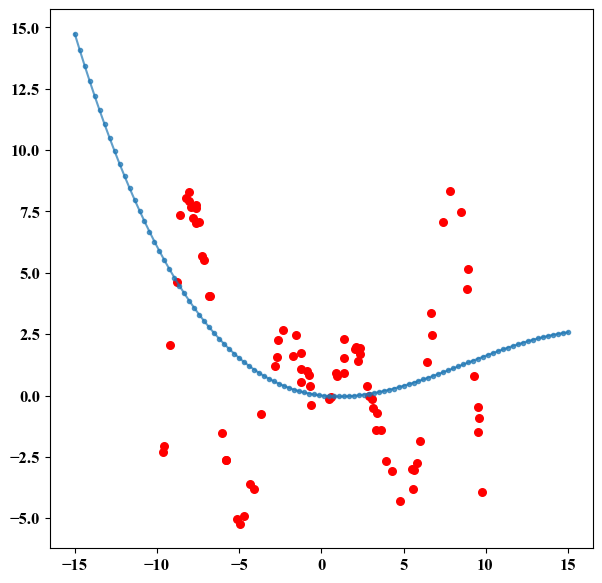

In [74]:
%matplotlib inline
xc = np.c_[x, x**2, x**3]  # make cubic features
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='red', marker='o', s=30);
theta_c = solve_lstq(xc,y)
x_interp_c = np.c_[x_interp, x_interp**2, x_interp**3]
y_interp_c = np.dot(theta_c.T, x_interp_c.T)
plt.plot(x_interp_c[:, 0], y_interp_c.T, alpha=0.7, marker='.');

# Let's check the training error (or fitting error) again


```python 
err = np.power(y - np.dot(theta_c.T, xc.T), 2).mean()
```

**Numerically it seems pretty high!**

{{print(np.power(y - np.dot(theta_c.T, xc.T), 2).mean())}}

In [75]:
errors.append(np.power(y - np.dot(theta_c.T, xc.T), 2).mean())

# We can analyze what happens in function of  $m$


We can have another dimensionality $m$ instead of $d$ by using **Basis Functions** $\bmf{\phi}(\mbf{x})$.

With $\bmf{\phi}(\mbf{x} = [1,\phi(x_1),\ldots,\phi(x_m)]$ and $\mbf{\theta} = [\theta_0,\theta_1,\ldots,\theta_m]$, we have:

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^m\theta_i\cdot x_i = \bmf{\theta}^T\bmf{\phi}(\mbf{x}) $$

For Linear Regression:
- $m > d$, and
- the **Basis Functions** is : $\phi_m(\mbf{x}) = x^m$


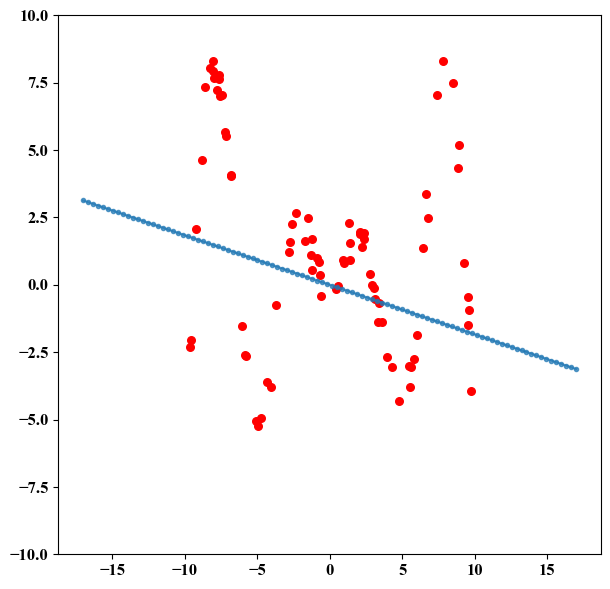

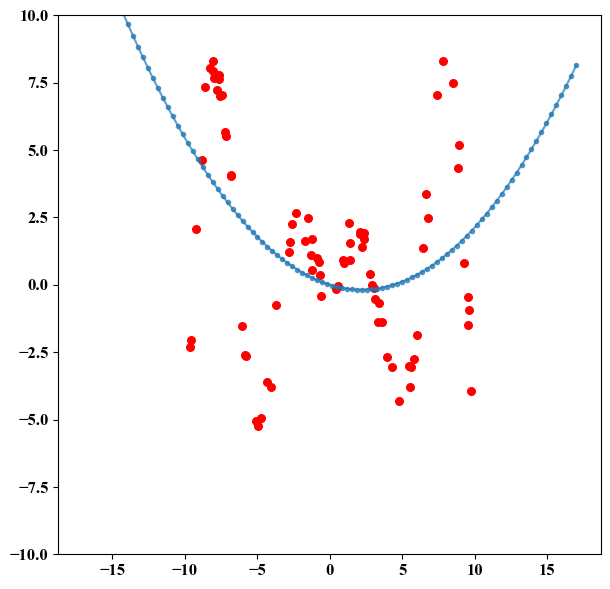

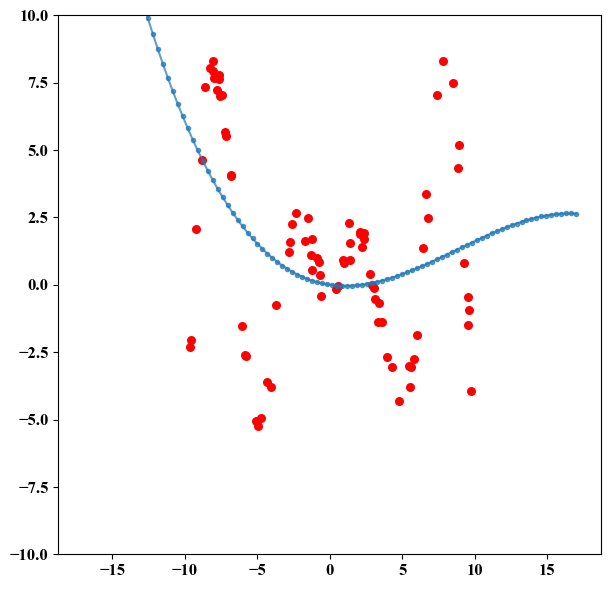

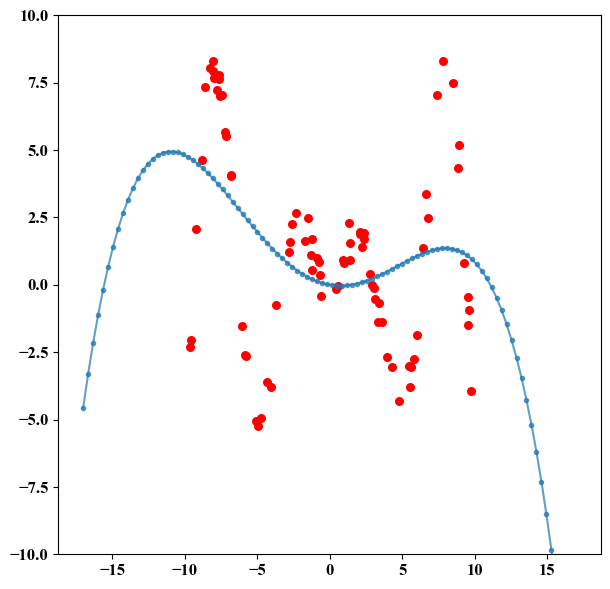

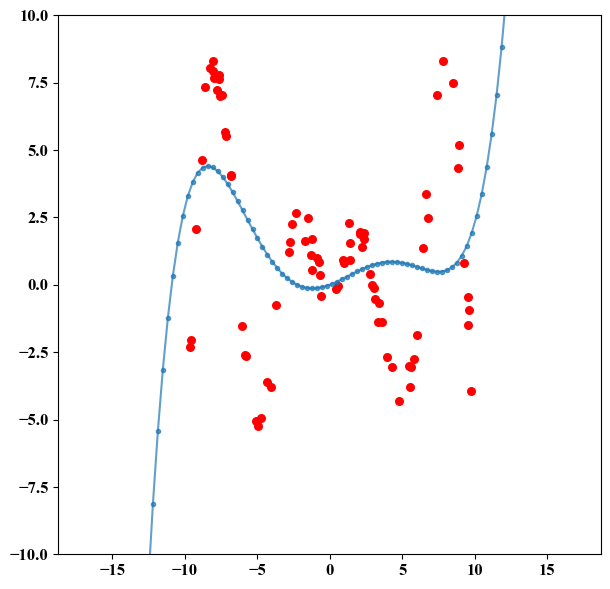

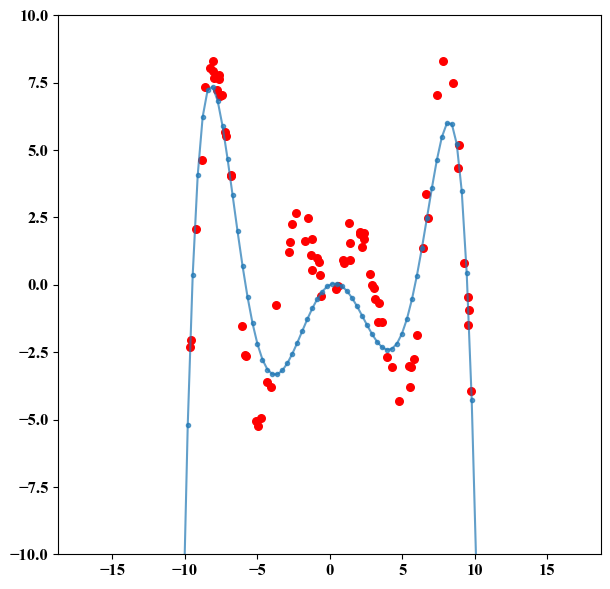

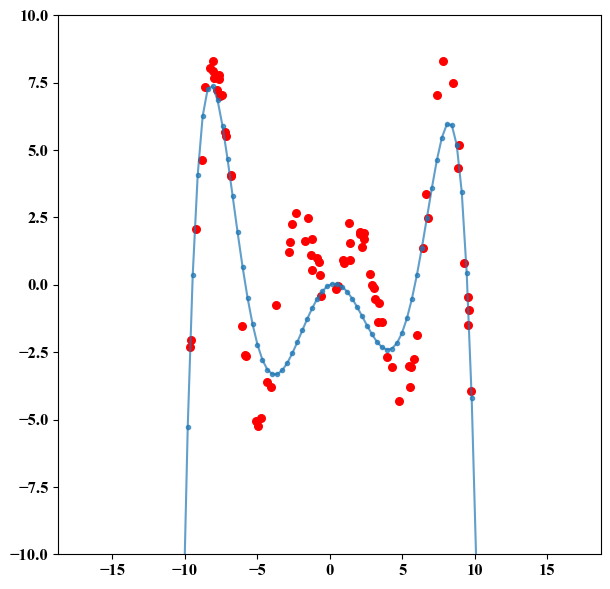

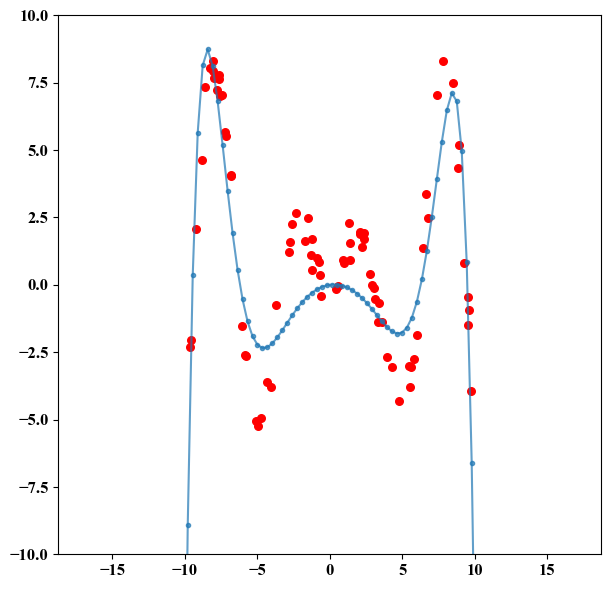

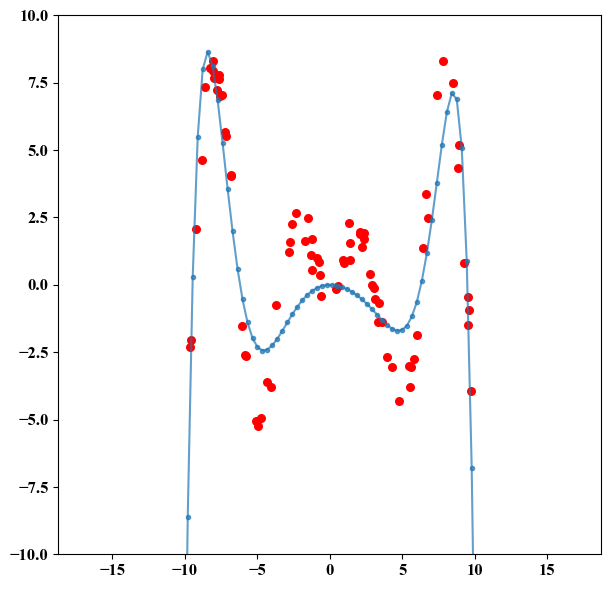

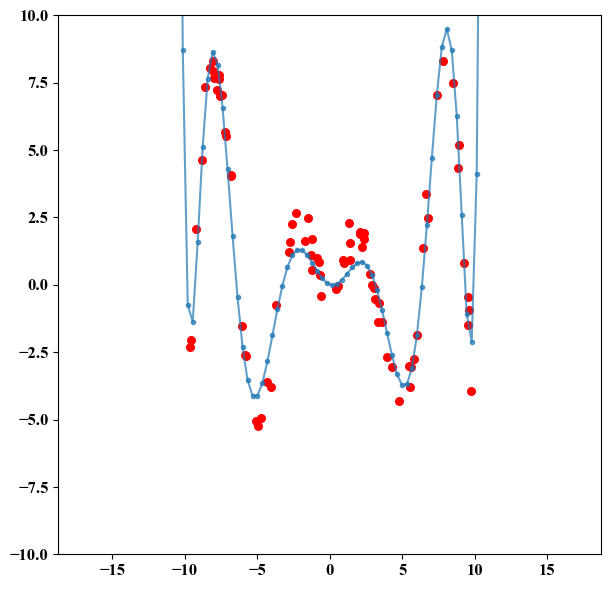

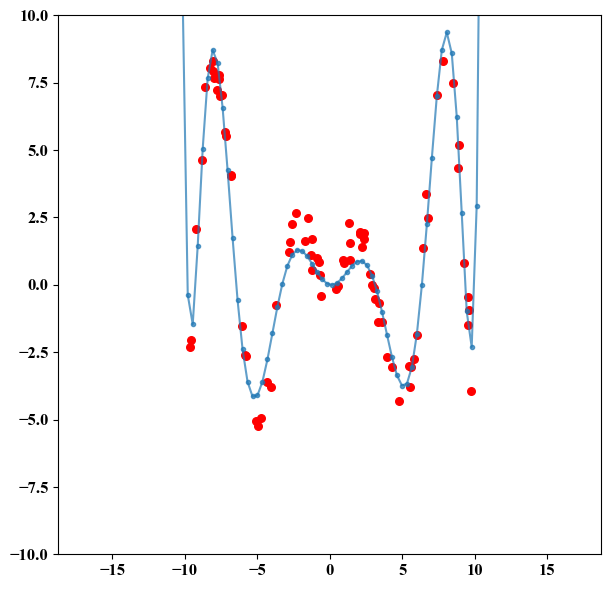

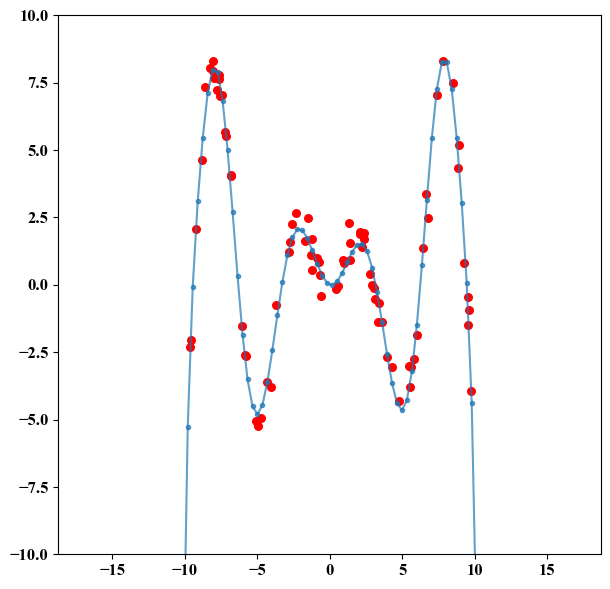

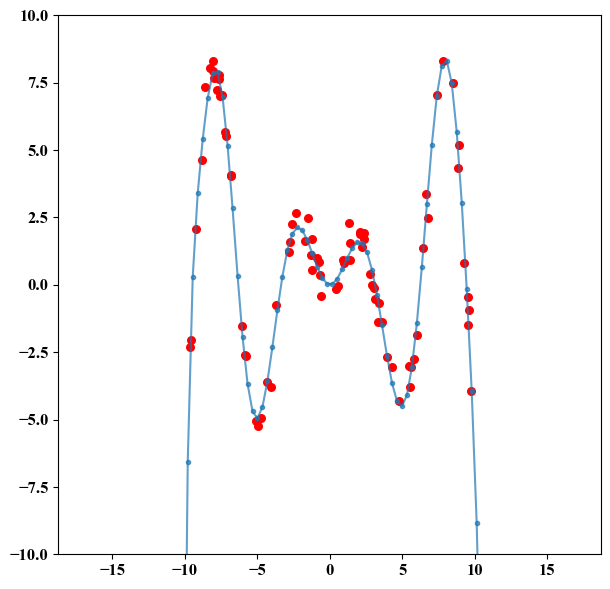

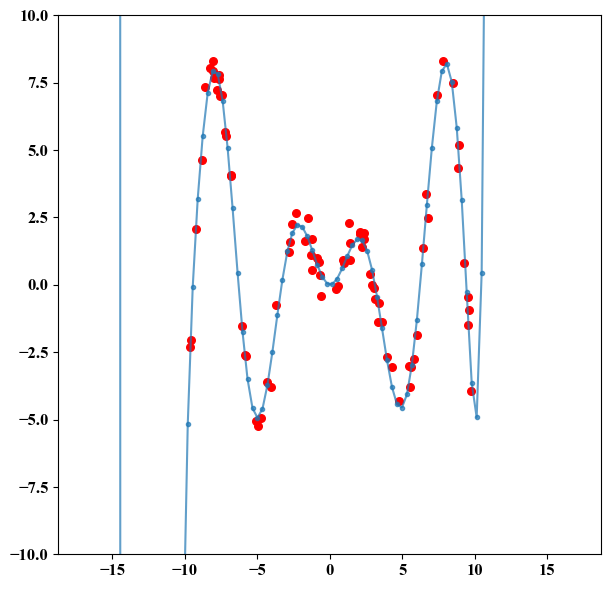

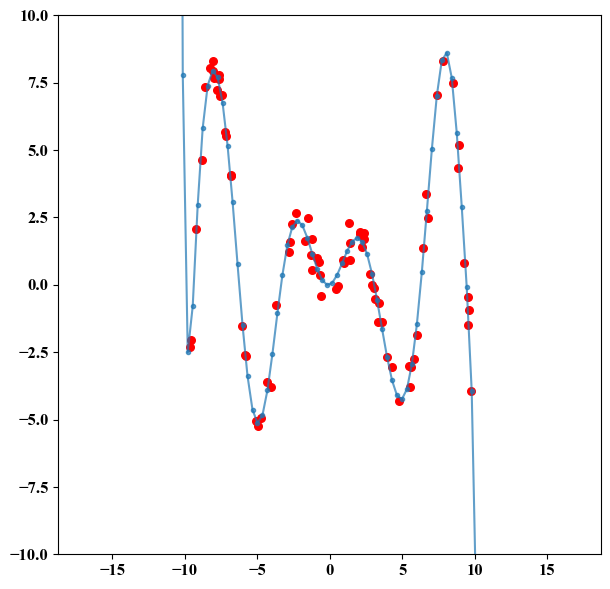

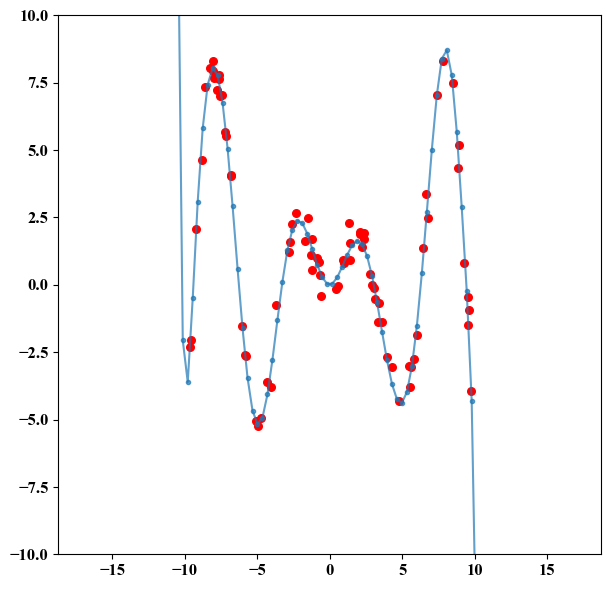

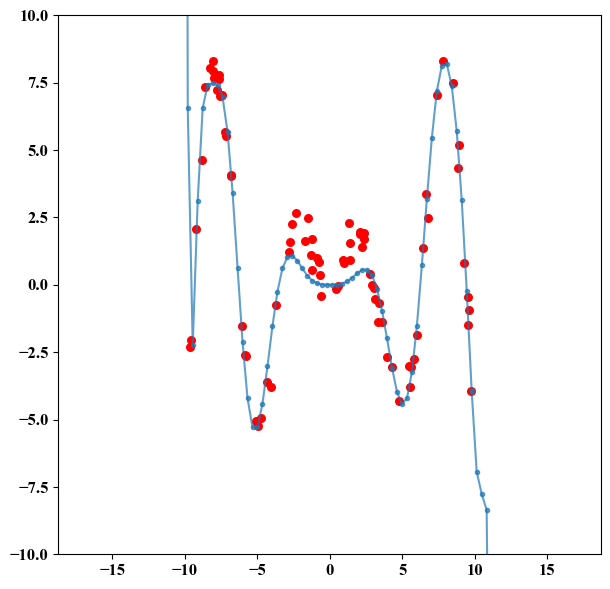

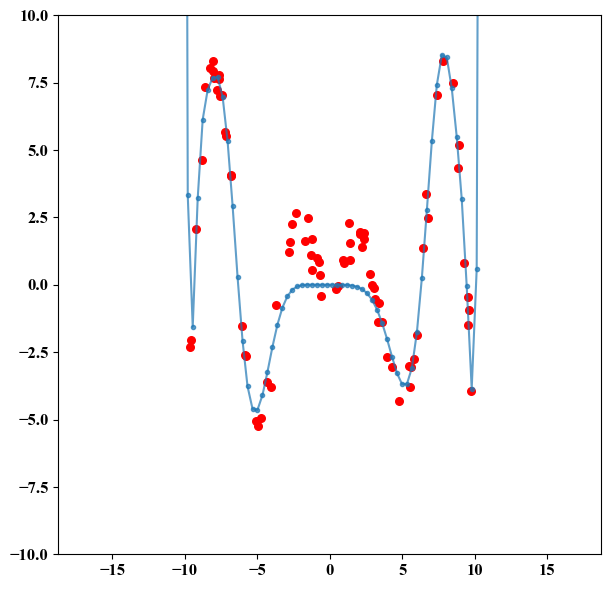

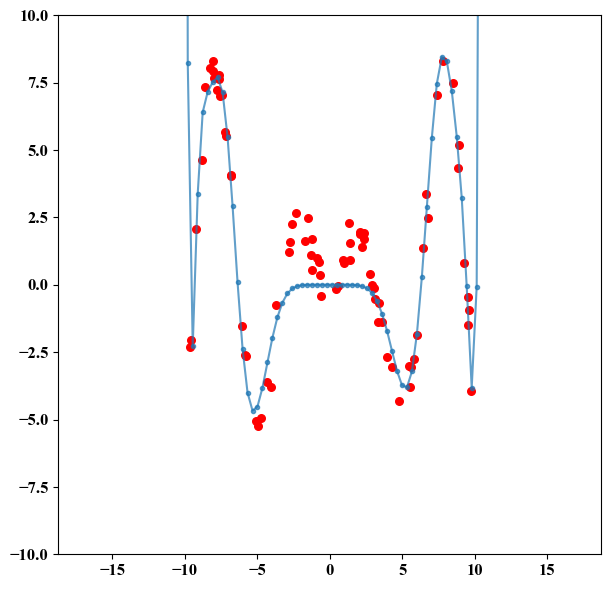

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

errors = []
errors_valid = []
models = []
for m in range(1, 20):
    model = Pipeline([('poly', PolynomialFeatures(degree=m, include_bias=False, interaction_only=False)),
                      ('linear', LinearRegression(fit_intercept=False))])
    models.append(model)
    model = model.fit(x, y)
    x_interp = np.linspace(-support_X-offset_valid,
                           support_X+offset_valid, 100).reshape(-1, 1)
    y_interp = model.predict(x_interp)
    y_est = model.predict(x)
    errors.append(np.power(y - y_est, 2).mean())
    errors_valid.append(np.power(y_valid - model.predict(x_valid), 2).mean())
    # Draw
    plt.figure(figsize=(7, 7))
    plt.scatter(x, y, c='red', marker='o', s=30)
    plt.plot(x_interp, y_interp, alpha=0.7, marker='.')
    plt.ylim([-10, 10])

# Now let's check both the errors in train and validation

M best (polynomial degree is) 3


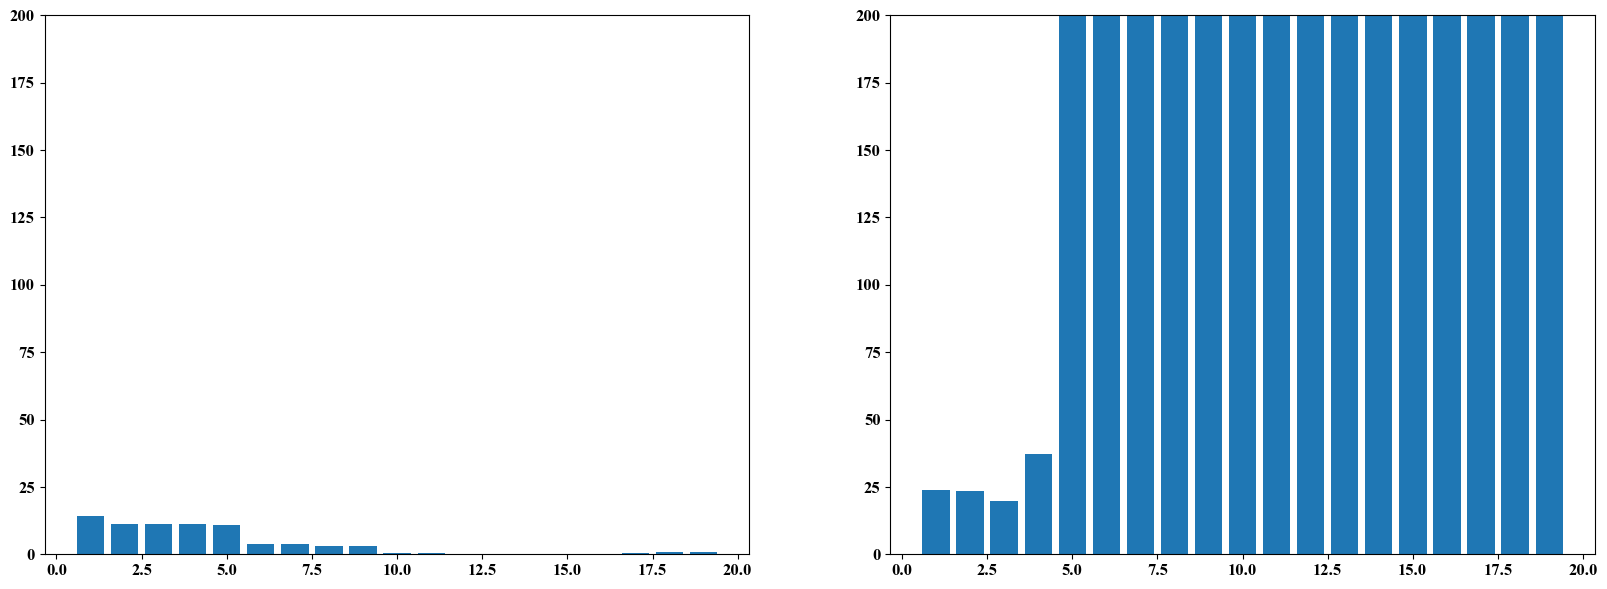

In [77]:
fig, axes = plt.subplots(1,2, figsize=(20, 7))
axes[0].bar(range(1, 20), errors)
axes[1].bar(range(1, 20), errors_valid);
axes[1].set_ylim([0,200])
axes[0].set_ylim([0,200])
m_best = np.argmin(errors_valid)
print(f'M best (polynomial degree is) {m_best+1}')

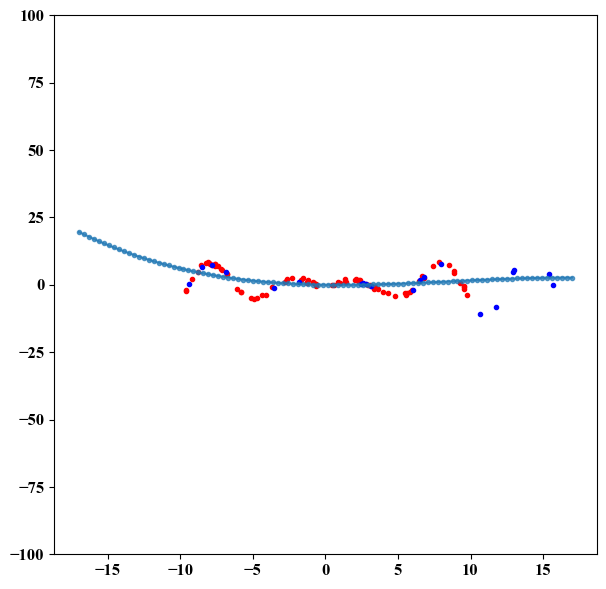

In [78]:
# Draw
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='red', marker='.')
plt.scatter(x_valid, y_valid, c='blue', marker='.')
y_interp = models[m_best].predict(x_interp)
plt.plot(x_interp, y_interp, alpha=0.7, marker='.');
plt.ylim([-100,100]);

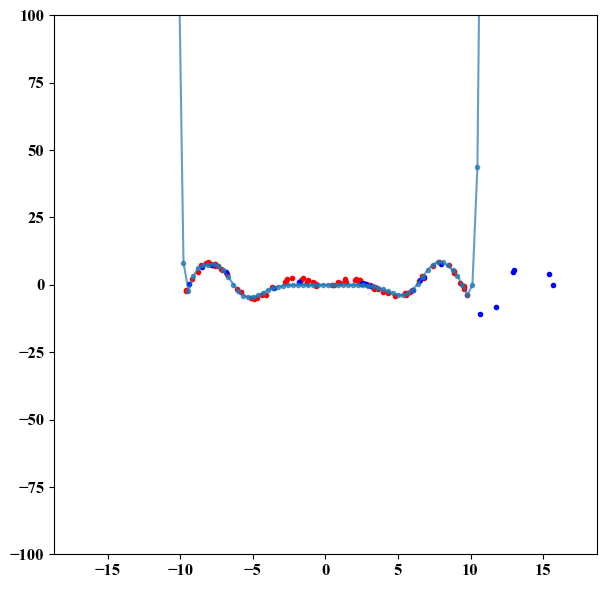

In [79]:
# Draw
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='red', marker='.')
plt.scatter(x_valid, y_valid, c='blue', marker='.')
y_interp = models[-1].predict(x_interp)
plt.plot(x_interp, y_interp, alpha=0.7, marker='.');
plt.ylim([-100,100]);

# Over or Under Fitting

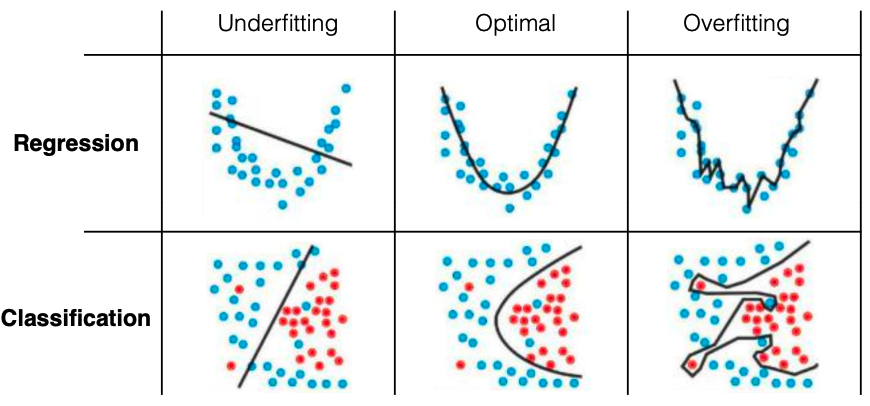

# Problem of Polynomial Regression

The basis function $\bmf{\phi}_m(\mbf{x}) = x^m$ is **global** wrt the domain of the feature $x$.

- The big limitation of polynomial basis functions is that they are **global functions of the input variable**, so that **changes in one region of input space affect all other regions.**

- This can be resolved by dividing the input space up into regions and fit a different polynomial in each region, leading to **spline functions** (that we do not cover).

<center><img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_001.png' width='40%' /> </center>


# Hint on Spline Functions

<center><img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_002.png' width='90%' /> </center>

# Other Basis Functions

<center><img src='figs/basis_functions.png' width='70%' /> </center>

# Limitations of Basis Functions

**Advantage:** It is simple, and your problem stays convex and well behaved. (i.e. you can still use your original gradient descent code, just with the higher dimensional representation)

**Disadvantage:** $\phi(x)$ might be **Very** high dimensional.


```python
X = PolynomialFeatures(interaction_only=True).fit_transform(X)
```

In [80]:
X_rand = np.array([[3, 7]], dtype=float)
print(f'Input Dimension {X_rand.shape}')
X_rand_poly = PolynomialFeatures(
    degree=2, interaction_only=False).fit_transform(X_rand)
print(f'Output Dimension {X_rand_poly.shape}')
print(X_rand[0, :], X_rand_poly[0, :], sep='\n')

Input Dimension (1, 2)
Output Dimension (1, 6)
[3. 7.]
[ 1.  3.  7.  9. 21. 49.]


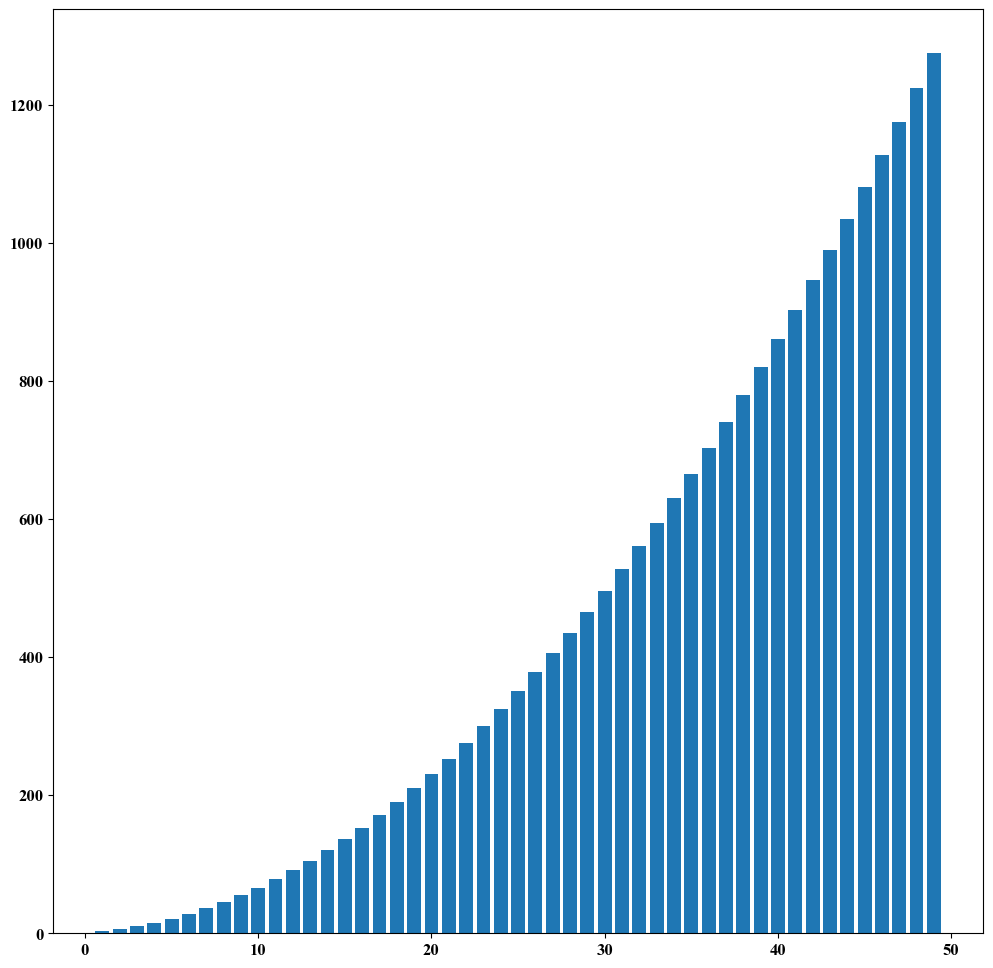

In [81]:
%matplotlib inline
new_size = [PolynomialFeatures(degree=2, interaction_only=False).fit_transform(
    np.random.rand(1, d)).shape[1] for d in range(1, 50)]
plt.figure(figsize=(12,12))
plt.bar(range(1, 50), new_size);

# Debug the Coefficients


<center><img src='figs/overfit_poly.png' width='60%' /> </center>


# Debug the Coefficients $\rightarrow$ Large Coefficients lead to overfit


<center><img src='figs/table_coeff.png' width='70%' /> </center>


# Remedy for Large Coefficients: _Weight Decay_ ($\ell_2$ Regularization)

We minimize the cost plus **penalty term** $$ \mathcal{J}(\mbf{\theta};\mbf{x},y)= \frac{1}{2} \sum_{i=1}^{n}\mathcal{L}\big(y_{i}, f_{\boldsymbol{\theta}}(\mbf{x}_i)\big) + \frac{\lambda}{2} \bmf{\theta}^T \bmf{\theta}= \frac{1}{2} \sum_{i=1}^{n}\mathcal{L}\big(y_{i}, f_{\boldsymbol{\theta}}(\mbf{x}_i)\big) + \frac{\lambda}{2} \vert\vert\bmf{\theta}\vert\vert_2^2 $$ so to find:

$$\mbf{\theta}^{\star} = \arg\min_{\mbf{\theta}} \mathcal{J}_{\text{data}}(\mbf{\theta};\mbf{x},y)  +\lambda\mathcal{J}_{\text{reg.}}(\mbf{\theta}) $$

## Still has a Closed Form Solution (Regularized Least Squares)

$$\bmf{\theta} = (\lambda \mbf{I} +  \mbf{X}^T\mbf{X})^{-1} \mbf{X}^T\mbf{y}$$


_Regularization allows complex models to be trained on data sets of limited size without severe over-fitting, essentially by limiting the effective model complexity_

# Linear Regression with _Weight Decay_ ($\ell_2$ Regularization)


Consider the eigendecomposition of the symmetric **Positive Semi Definite
(PSD)** matrix $\mbf{X}\mbf{X}^T$:

$$
X^{T} X= U \Sigma U^{T} =U \underbrace{\left[\begin{array}{ccc}
\sigma_{1}^{2} & \ldots & 0 \\
\vdots & \ddots & \vdots \\
0 & \ldots & \sigma_{d}^{2}
\end{array}\right]}_{\operatorname{diag}\left(\sigma_{1}^{2}, \ldots, \sigma_{d}^{2}\right)} U^{T}
$$


$\sigma_{1}^{2}, \ldots, \sigma_{d}^{2}$ are the eigenvalues and  $ UU^{T} = Id$   (since $\Sigma$ is symmetric and square).

 If $\mbf{X}$ and $\mbf{X}\mbf{X}^T$ are not full rank then some of $\sigma$ may be zeros.


# Linear Regression with _Weight Decay_ ($\ell_2$ Regularization)


This implies that if we regularized it, then the pseudo inverse is **always invertible and has a unique solution** since $\lambda > 0$:

$$
X^{T} X+\lambda I=U\left[\begin{array}{ccc}
\sigma_{1}^{2}+\lambda & \ldots & 0 \\
\vdots & \ddots & \vdots \\
0 & \ldots & \sigma_{d}^{2}+\lambda
\end{array}\right] U^{T}
$$

# Linear Regression with _Weight Decay_ ($\ell_2$ Regularization)


This implies that if we regularized it then the pseudo inverse is **always invertible and has a unique solution** since $\lambda > 0$:

$$
\left(X^{T} X+\lambda I\right)^{-1}=U\left[\begin{array}{ccc}
\frac{1}{\sigma_{1}^{2}+\lambda} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sigma_{d}^{2}+\lambda}
\end{array}\right] U^{T}
$$

# Bias-Variance for Linear Reg. with _Weight Decay_ ($\ell_2$ Regularization)

$$
\begin{aligned}
\hat{\theta}_{n} &=\left(X^{T} X+\lambda I\right)^{-1} X^{T} \vec{y} \\
&=\left(X^{T} X+\lambda I\right)^{-1} X^{T}\left(X \theta^{*}+\vec{\epsilon}\right) \\
&=\left[\left(X^{T} X+\lambda I\right)^{-1} X^{T} X\right] \theta^{*}+\left[\left(X^{T} X+\lambda I\right)^{-1} X^{T}\right] \vec{\epsilon}
\end{aligned}
$$

$$
\begin{aligned}
\mathbb{E}\left[\hat{\theta}_{n}\right]=& \mathbb{E}\left[\left[\left(X^{T} X+\lambda I\right)^{-1} X^{T} X\right] \theta^{*}+\left[\left(X^{T} X+\lambda I\right)^{-1} X^{T}\right] \vec{\epsilon}\right] \\
=& {\left[\left(X^{T} X+\lambda I\right)^{-1} X^{T} X\right] \theta^{*}+\left[\left(X^{T} X+\lambda I\right)^{-1} X^{T}\right] \mathbb{E}[\vec{\epsilon}] } \\
=& {\left[\left(X^{T} X+\lambda I\right)^{-1} X^{T} X\right] \theta^{*}+\left[\left(X^{T} X+\lambda I\right)^{-1} X^{T}\right] \overrightarrow{0} } \\
=& {\left[\left(X^{T} X+\lambda I\right)^{-1} X^{T} X\right] \theta^{*} } \\
=& U {\left[\begin{array}{ccc}
\frac{1}{\sigma_{1}^{2}+\lambda} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sigma_{d}^{2}+\lambda}
\end{array}\right] U^{T} X^{T} X \theta^{*} } \\
=& U {\left[\begin{array}{ccc}
\frac{1}{\sigma_{1}^{2}+\lambda} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sigma_{d}^{2}+\lambda}
\end{array}\right] \underbrace{U^{T} U}_{Id}\left[\begin{array}{ccc}
\sigma_{1}^{2} & \ldots & 0 \\
\vdots & \ddots & \vdots \\
0 & \ldots & \sigma_{d}^{2}
\end{array}\right] U^{T} \theta^{*} } \\
=& U {\left[\begin{array}{ccc}
\frac{1}{\sigma_{1}^{2}+\lambda} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \ldots & \frac{1}{\sigma_{d}^{2}+\lambda}
\end{array}\right]\left[\begin{array}{ccc}
\sigma_{1}^{2} & \ldots & 0 \\
\vdots & \ddots & \vdots \\
0 & \ldots & \sigma_{d}^{2}
\end{array}\right] U^{T} \theta^{*} } \\
=& U\left[\begin{array}{ccc}
\frac{\sigma_{1}^{2}}{\sigma_{1}^{2}+\lambda} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \frac{\sigma_{d}^{2}}{\sigma_{d}^{2}+\lambda}
\end{array}\right] U^{T} \theta^{*} .
\end{aligned}
$$

# Bias-Variance for Linear Reg. with _Weight Decay_ ($\ell_2$ Regularization)

- From the above, we can make a few observations. First, when $\lambda=0$, we see that  $\mathbb{E}[\theta_n] = \theta$. This implies that the **standard linear regression estimator (without regularization) is Unbiased.**
- The more regularization we add (i.e. larger $\lambda$), the smaller the eigenvalues will be, and hence the stronger the “shrinkage” towards 0. Thus it is biased towards zero.

# Weight Decay arises from Bayesian Linear Regression


$$ \epsilon = y_i - \bmf{\theta}^T\mbf{x}_i \sim \mathcal{N}(0,\sigma^2)$$

$$ \mbf{\theta} \sim \mathcal{N}(0,\bmf{\Theta}^2) \quad \texttt{prior on weights}$$

**Unlike MLE, now there is a Gaussian prior on the weights;
We solve it by doing Maximum A Posteriori (MAP)**

# Hint on Bayesian Linear Regression

<center><img src='figs/BayesianLR.png' width='40%' /> </center>
